z# **Milestone 2 - Predicting Loan Approval**

---

# **1. Introduction**

Name  : Michael Parsaoran  
Batch : HCK-016 

**Objective**  
The goal of this project is to construct a machine learning model that predicts Loan Approval. We'll explore five different classificaton models: K-Nearest Neighbor (KNN), Support Vector Machine (SVM), Decision Tree, and Random Forest and also boosting algorithm XGBClassifier. Each model will be carefully evaluated using cross-validation and performance metrics such as F1 score. After identifying the best base model, we'll fine-tune its parameters to improve its accuracy too. Finally, we'll compare the tuned model with the base one to choose the best option for predicting Airline applicant satisfaction accurately and reliably.

**Dataset Information**  
This project utilizes a raw dataset sourced from kaggle.com titled *"Loan Approval Dataset"* uploaded by Rohit Sharma. The dataset comprises information on various attributes of loan applicants, including demographic details, financial status, employment history, and ownership status. The dataset includes both numerical and categorical features, making it suitable for diverse analytical approaches. For access to the dataset source, you can click [here!](https://www.kaggle.com/datasets/rohit265/loan-approval-dataset)

**Dataset Description Table**
<center>

| Column Name       | Description                                                                                                         |
|-------------------|---------------------------------------------------------------------------------------------------------------------|
| ID                | Unique identifier for each loan applicant.                                                                          |
| Income            | The income level of the applicant.                                                                                  |
| Age               | Age of the applicant.                                                                                               |
| Experience        | Years of professional experience.                                                                                   |
| Married/Single    | Marital status of the applicant.                                                                                    |
| House_Ownership   | Indicates whether the applicant owns or rents a house.                                                              |
| Car_Ownership     | Indicates whether the applicant owns or rents a house.                                                              |
| Profession        | Occupation or profession of the applicant.                                                                          |
| City              | City of residence of the applicant.                                                                                 |
| State             | State of residence of the applicant.                                                                                |
| Current_Job_Yrs   | Duration of employment in the current job.                                                                          |
| Current_House_Yrs | Duration of residence in the current house.                                                                         |
| Risk_Flag         | Binary indicator of loan risk, where 1 represent a flagged risky applicant and 10 represents a non-risky applicant. |

</center>

# **2. Import Libraries**  

In [274]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For real time currency rates
from forex_python.converter import CurrencyRates

# For Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, spearmanr
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression

# For Model Definition & Training
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For Model Evaluation
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score


# For Saving Models
import pickle

# To Deactivate Warnings
import warnings
warnings.filterwarnings('ignore')

# Displaying all columns
pd.options.display.max_columns = 200

**Import Libraries - Explanation**

Before we commence the project, we `import all the necessary libraries required to facilitate various tasks throughout the project`. Each library serves as a tool for specific purposes as indicated by the comments provided above the code. These libraries provide functionalities ranging from data manipulation, visualization, and model building, etc., enabling us to efficiently conduct data analysis and develop machine learning models for our project.

# **3. Data Loading**

## Loading The Data & Extract General Dataset Information

In [ ]:
# Loading csv data
df_raw = pd.read_json('data/loan_approval_dataset.json')

**Loading JSON Data - Explanation**

The next step is to import the dataset into the notebook for analysis. By utilizing the pandas read_json() method, `we can load the JSON data into the variable df_raw`. This allows us to access and manipulate the dataset within the notebook environment, enabling further exploration and preprocessing of the data for our analysis and modeling tasks.

In [276]:
# Show First 10 Row of Data
df_raw.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


**Show First 10 Row of Data - Explanation**  

Using pandas .head(), i could show only limited data located on the top of dataset. We could see that `the data succesfully loaded`. At the first glance, the columns consist of both categorical and numerical data. But, we still have to check the data type of each columns later on.

In [277]:
# Identifying Target Column
df_raw.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

**Identifying Target Column - Explanation**  
 
With .columns method we could display all column names in the dataset. Given our objective of constructing a machine learning model to predict Airline applicant satisfaction, it's evident that the `risk flag` column serves as the target variable for our prediction. This column represents the ultimate measure of applicant satisfaction, making it the focal point of our predictive analysis.

In [278]:
# Load Last 10 Row of Data
df_raw.tail(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251990,251991,349066,68,4,single,rented,no,Technical_writer,Madhyamgram,West_Bengal,4,11,0
251991,251992,6828311,36,11,single,owned,no,Designer,Nagpur,Maharashtra,11,13,0
251992,251993,7551745,57,7,married,rented,no,Secretary,Nadiad,Gujarat,4,12,0
251993,251994,8141027,60,10,single,rented,no,Secretary,Bhusawal,Maharashtra,9,13,1
251994,251995,7215678,27,8,single,rented,no,Aviator,Satna,Madhya_Pradesh,8,10,0
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


**Load Last 10 Row of Data - Explanation**  
 
To examine the bottom portion of the dataset, we utilize the pandas .tail() method, displaying a limited view of the data. Upon inspection, we observe that the last row is indexed at 251999, indicating that `the table comprises a total of 251999 data points`.

In [279]:
# Checking Data Summary 
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


**Checking Data Summary - Explanation**

By utilizing the .info() method, we gain small summary of the dataset, including the number of rows and columns, as well as the data types of each column. Here's a summary of the key observations extracted from the output:

- The dataset comprises of 252000 entries (rows) and 13 columns.
- Among the columns, there are no feature with float64 data type, while 6 columns are of the int64 data type, with 7 columns containing object data types.
- The entire dataset consumes approximately 26.9+ MB of memory. Quite big, but it is as expected because dataset have a large amount of data
- After closer examination, I have confirmed that each column has the right data type, and all the columns have the same amount of non-null row, therefore there is no row with missing value.

## Duplicating Raw Data

In [280]:
# Duplicating Raw Data 
df = df_raw.copy()

**Duplicating Raw Data - Explanation**

Before we start cleaning up the data, it's important to make a copy of the original data using the .copy() method. This way, `we can still refer back to the untouched data if necessary`.

## Check Data Duplicates

In [281]:
# Check Data Duplicates
df.duplicated().sum()

0

**Check Data Duplicates - Explanation**

The code above helps us find out if there are any duplicate entries in our dataset. When we run it, and the output shows 0, it means `there are no repeated rows or data duplicates in our dataset`. Therefore, we don't need to do anything further to handle duplicated data.

## Check Missing Values

In [282]:
# Checking missing values
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

**Checking Missing Values - Explanation**  
  
Code above used to show how many missing values on each column. The output of all columns are 0, therefore there aren't any missing data that have to be handled.

# **4. Exploratory Data Analysis (EDA)**

**EDA - Introduction**  

In this exploratory data analysis (EDA), we delve into the dataset aimed at predicting airline applicant information. `Our objective is to gain insights and understanding of the dataset before proceeding with model development`. By exploring various aspects such as applicant attributes, flight details, and target variables, we aim to uncover patterns, trends, and potential challenges that may influence the predictive modeling process. Through this EDA, we lay the groundwork for building an accurate classification model.

I'll categorize the EDA methods into three groups: univariate, bivariate, and multivariate. This helps organize our exploration, letting us focus on individual variables (univariate), pairs of variables (bivariate), and how multiple variables interact (multivariate), making it easier to understand the dataset's features and relationships.

## Numerical and Categorical Data Descriptive Summary

In [283]:
# Numerical Columns Descriptive Summary                                  
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Id,252000.000,126000.500,72746.278,1.000,63000.750,126000.500,189000.250,252000.000
Income,252000.000,4997116.665,2878311.014,10310.000,2503015.000,5000694.500,7477502.000,9999938.000
Age,252000.000,49.954,17.064,21.000,35.000,50.000,65.000,79.000
Experience,252000.000,10.084,6.003,0.000,5.000,10.000,15.000,20.000
CURRENT_JOB_YRS,252000.000,6.334,3.647,0.000,3.000,6.000,9.000,14.000
CURRENT_HOUSE_YRS,252000.000,11.998,1.399,10.000,11.000,12.000,13.000,14.000
Risk_Flag,252000.000,0.123,0.328,0.000,0.000,0.000,0.000,1.000


**Numerical Columns Data Descriptive Summary - Explanation**  

The code above generates a descriptive summary of numerical columns in the dataset, excluding object-type columns using the describe(). From the summary, we can observe that:  
- The average age of applicants is around 39 years, from 7 to 85 with a standard deviation of 15 years. 

- The average flight distance is approximately 1190 miles, ranging from 31 to 4983 miles.

- Notably, `applicants generally rate their flight experiences more moderately`, with mean scores above 3 for most service-related features.  

- There are `noticeable delays in both departure and arrival times`, with some flights experiencing significant delays of up to 1592 and 1584 minutes, with standard deviation of 14 to 15 minutes, respectively.


- applicants tend to be `less satisfied with inflight Wi-Fi service and ease of online booking` compared to other aspects of their flight experience because lower mean satisfaction score.

- The standard deviations highlight varying dispersion levels from the means, suggesting differing dataset variability and potential outliers, notably in "id," "age," "Flight Distance," "Departure Delay in Minutes," and "Arrival Delay in Minutes."

In [284]:
# Categorical Data Descriptive Summary
df.describe(include='object').T

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
CITY,252000,317,Vijayanagaram,1259
STATE,252000,29,Uttar_Pradesh,28400


**Categorical Columns Data Descriptive Summary - Explanation**  

The provided code generates a descriptive summary of categorical columns in the dataset using the describe() function with include='object' parameter. From the summary, we observe that:  
- The dataset contains 129,880 records, all of which are categorical data.  

- In terms of gender, there are two unique values, with "Female" being the most frequent, indicating a `higher proportion of female customers`.  

- "Customer Type" also has two unique values, with "Loyal Customer" being the most frequent, suggesting a `majority of customers are loyal to Japan's Airlines`.  

- "Type of Travel" has two unique values, with "Business travel" being the most frequent, indicating that `most customers travel for business purposes`.  

- Among the classes, "Business" class is the most common, suggesting a `preference for premium seating options`.    

- The majority of customers express "neutral or dissatisfied" satisfaction, `indicating possibility of overall dissatisfaction with Japan's Airline performance`.


## Check Data Cardinality

In [285]:
# Create Column Cardinality Checking Function
def check_column_cardinality(dataframe):
    '''
    This function checks the unique values and checking cardinality status in each column of a given dataset
    
    INPUT: dataframe - the dataset to analyze
    OUTPUT: a table containing columns, the number of unique values in each column, 
            a list of unique values for each column
            the status of cardinality
    '''   
    column_names = list(dataframe.columns)
    unique_counts = []
    unique_values = []
    cardinality_status = []
    
    for column in column_names:
        unique_count = len(dataframe[column].unique())
        unique_counts.append(unique_count)        
        unique_values.append(sorted(dataframe[column].unique().tolist()))
        
        if unique_count > 10:
            cardinality_status.append("high")
        else:
            cardinality_status.append("low")
        
    data = {'column_names': column_names, 
            'total_unique_counts': unique_counts,
            'unique_values': unique_values,
            'cardinality_status': cardinality_status}
    
    print('Columns Cardinality Checking Table')
    display(pd.DataFrame(data=data))

# Example usage:
# check_column_cardinality(df)


**Column Cardinality Checking Function - Explanation**

This function is designed to analyze the uniqueness of values, and cardinality status in each column of a given dataset. There are no exact values of what considered high cardinality, for simplicity purposes i decided that distinct values above 10 as high cardinality. The function iterates through each column, calculating the number of unique values, and listing out the unique values themselves. Finally, it compiles this information into a table format for easy interpretation.

In [286]:
# Using Function to Check Columns Cardinality
check_column_cardinality(df)

Columns Cardinality Checking Table


,column_names,total_unique_counts,unique_values,cardinality_status
0,Id,252000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",high
1,Income,41920,"[10310, 10675, 11114, 11430, 11483, 11550, 116...",high
2,Age,59,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3...",high
3,Experience,21,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",high
4,Married/Single,2,"[married, single]",low
5,House_Ownership,3,"[norent_noown, owned, rented]",low
6,Car_Ownership,2,"[no, yes]",low
7,Profession,51,"[Air_traffic_controller, Analyst, Architect, A...",high
8,CITY,317,"[Adoni, Agartala, Agra, Ahmedabad, Ahmednagar,...",high
9,STATE,29,"[Andhra_Pradesh, Assam, Bihar, Chandigarh, Chh...",high


**Column Cardinality Checking Table - Insight**  

From the output table, we can observe that:

- The dataset mainly consist of low cardinality columns (18 columns)

- There are 5 high cardinality columns ('id', 'age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'). Since 'id' is just identifier and doesn't affect other features and target, this column will be dropped later.

- There are two category of data :
    - Numeric:
        - Continous: This includes features like Age, Flight Distance, Departure Delay in Minutes, and Arrival Delay in Minutes
        - Discrete: all satisfaction-related columns

    - Categorical: 
        - Discrete: Found in gender, type of travel, class, , and also satisfaction. These columns will undergo encoding into numeric format while retaining their categorical attributes during the feature preparation phase.

In [287]:
# Grouping Columns
num_cont_cols = ['Age', 'Income']

# Numerical Columns
num_disc_cols = ['Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Categorical Columns
cat_disc_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY',  'STATE']

**Grouping Columns - Explanation**  

The code above grouped dataset into three set of variables. Grouping the dataset's columns helps in organizing the data, making it easier for us to understand, analyze, and preprocess it, tailoring into each data type, which i hope will facilitating more efficient and effective data analysis and modeling processes.

## Univariate Analysis

### *What is the distribution of applicant ages in the dataset?*

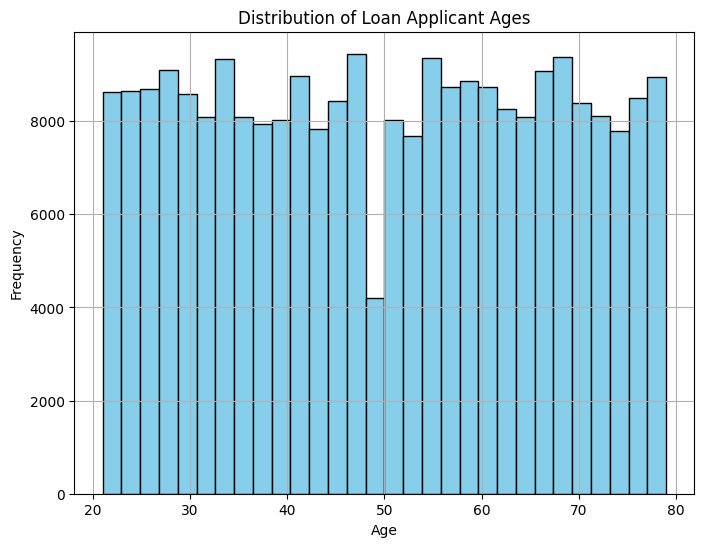

In [288]:
# Histogram Plot of applicant Ages
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Applicant Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Distribution Plot of Loan Applicant Ages**

- Based on the plot we can see that the distribution we can see that the applicant's age is evenly distributed but we can see applicants with age 48-50 are significantly lower than others in the distribution.
- Despite the average retirement age in India is at 60 years, there are a lot of applicants aging more than 60 years. This might implied that most retired people have little to none amount of savings, or tbe retirees struggle to maintain their lifestyle without stable income.

### *What Are the Percentage of Applicant Getting Accepted or Not??*

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

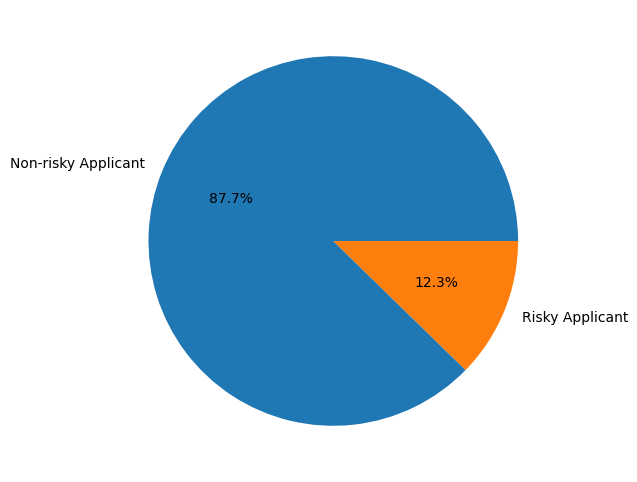

In [289]:
plt.figure(figsize=(8, 6))
plt.pie(df['Risk_Flag'].value_counts(), labels=['Non-risky Applicant', 'Risky Applicant'], autopct='%1.1f%%')

df['Risk_Flag'].value_counts()

**Pie Plot of Applicant's Risk Flag - Insights**  
From the chart we can see that the data is imbalance, while the amount of risky applicant is 12.3% of the population, the amount of non-risky applicant is 87.7% of the population, or 221,004 applicant. This suggests that the data is imbalance, therefore we need to do data balancing.


### *What is the profession among all of the applicants?*

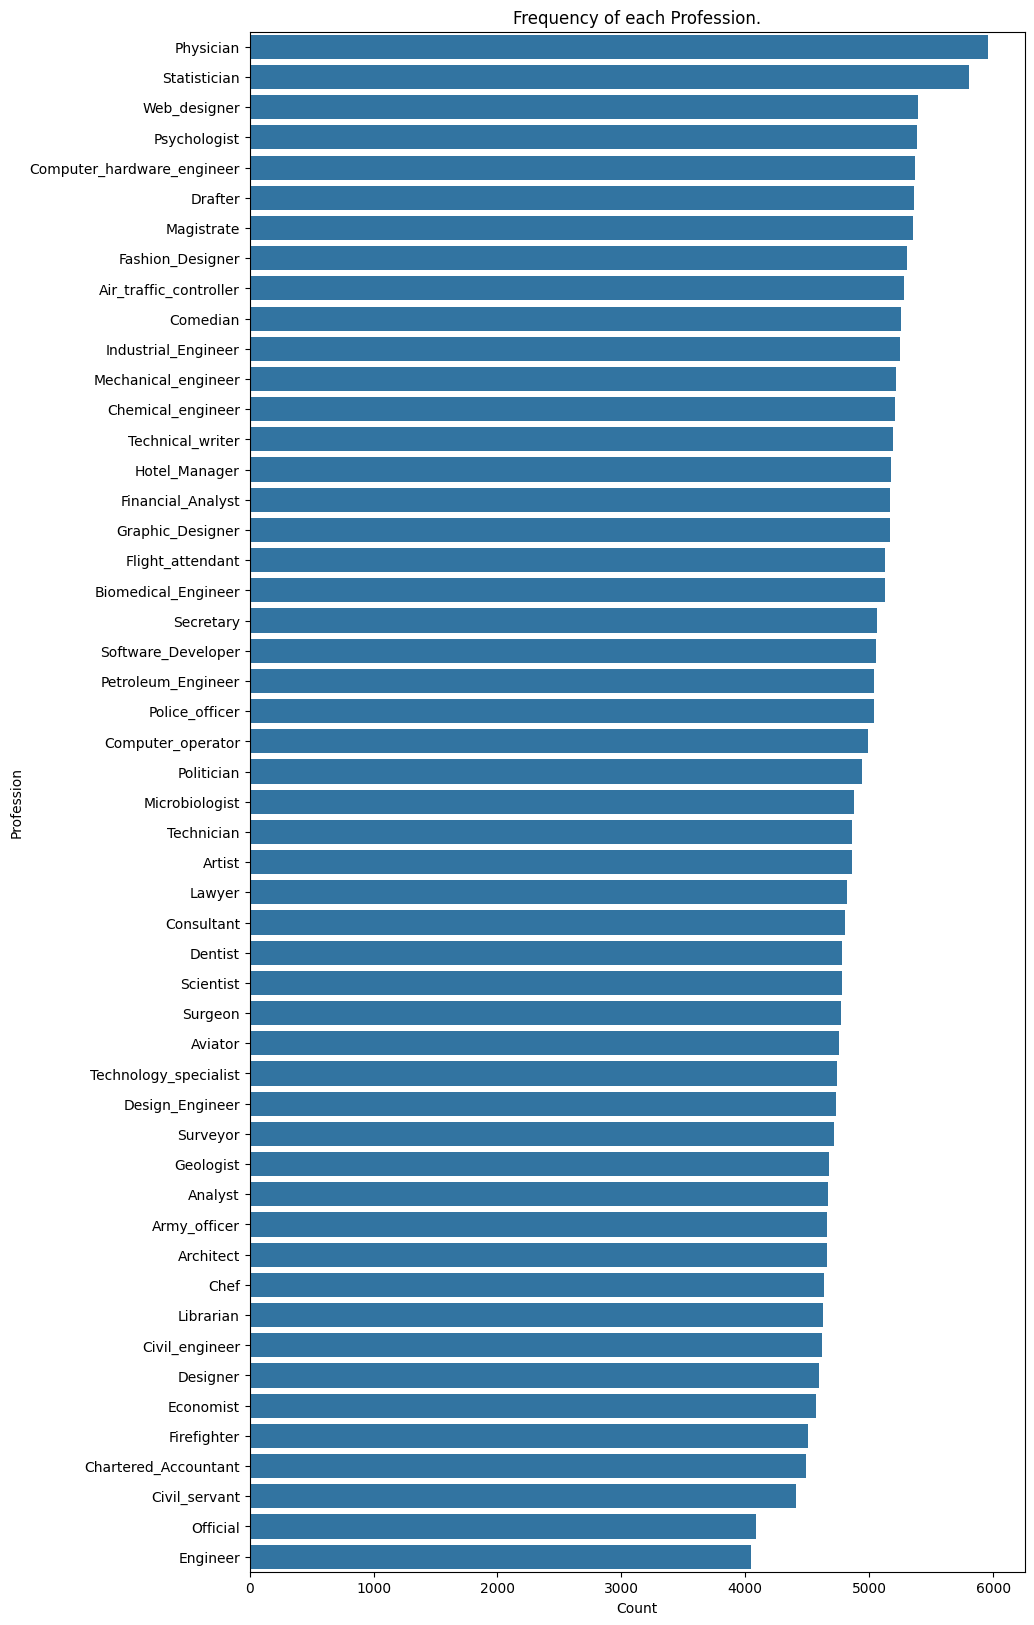

In [290]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Profession'], order = df['Profession'].value_counts().index)
plt.title("Frequency of each Profession.")
plt.ylabel("Profession")
plt.xlabel("Count")
plt.show()

**Count plot of applicant's profession - Insights**  

The visualization shows the profession all of the applicants. We can see here that among all the profession, Physician and Statistician are more likely to apply for a loan than the rest of the profession, and Officials and Engineers are less likely to apply for a loan. The reason for this mostly because of Physician needs to pursue higher education to gain more income, as we see Physicians are more likely apply for a loan than the other profession within the same field (e.g. Dentist, Surgeon), and government officials less likely to apply for a loan for education because officials have access to scholarship exclusive for government officials (e.g. Government Scholarships for Higher Education).

Apart from those two, we didn't find any other reasons for Statistician and Engineer to apply for a loan, because there are other kind of engineers in the list of professions (e.g. Industrial Engineer, Chemical Engineer, Mechanical Engineer).

### *How much year of experience each applicant has?*

Text(0.5, 0, 'Current Job Experience (YOE)')

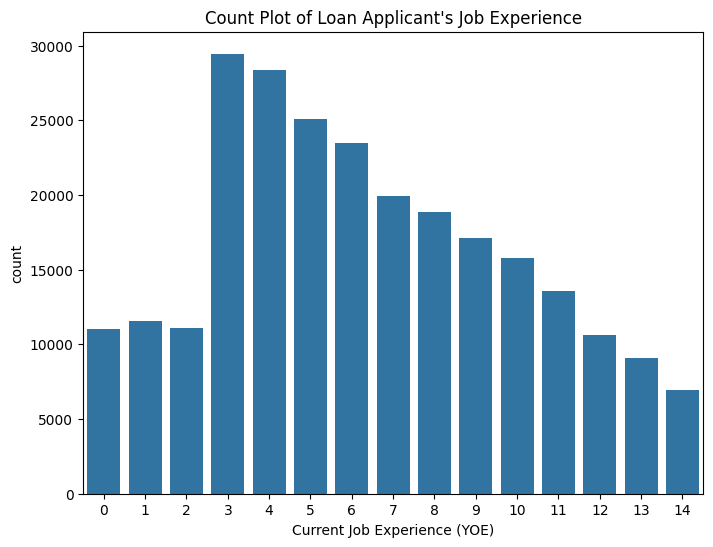

In [291]:
plt.figure(figsize=(8,6))
plt.title("Count Plot of Loan Applicant's Job Experience")
sns.countplot(data = df, x = "CURRENT_JOB_YRS")
plt.xlabel("Current Job Experience (YOE)")

**Count Plot of Loan Applicant's Job Experience - Insights**
- People with job experience below three years old are less likely to apply for a loan.
- The highest amount of loan applicants is seen at 3 years of experience followed by 4 years, and the amount gradually declining as the years of experience increase.

Without further information, we could assume that:
- As individuals gain more experience and advance in their careers, their income generally increases, leading to better financial stability and reduced reliance on loans.
- Early-career employees may have less job security compared to more experienced people. This reason might be leading cause of people with job experience below three years to apply for a loan.
- Younger employees or those new to the workforce might be more conservative in their financial behavior, avoiding loans due to fear of debt or lack of familiarity with financial products.

<Axes: xlabel='Age', ylabel='Income'>

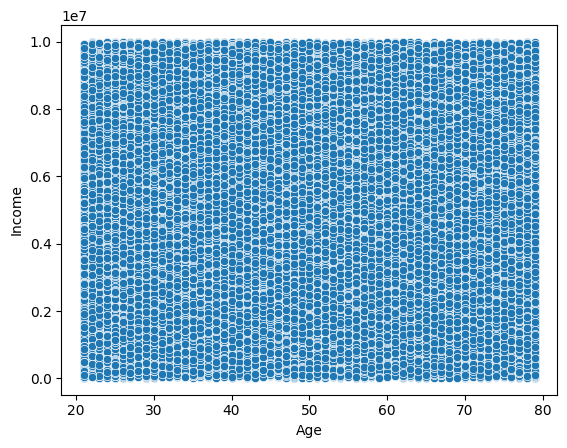

In [292]:
sns.scatterplot(df, x = "Age", y = "Income")

**Histogram of Departure Delay in Minutes - Insights**  

The visualization of Departure Delay in Minutes reveals that most flight delays fall between 15 to 80 minutes, showing that `moderate delays are common`. Occasionally, delays range from 90 to 240 minutes, indicating more significant disruptions. There are also extremely rare instances where delays reach up to 1592 minutes (from descriptive summary), representing highly unusual and severe cases. This suggests that while most delays are manageable, there are occasional challenges with longer delays that can significantly affect travel plans.

### *How satisfied are applicants with inflight Wi-Fi service?*

## EDA Insight's Summary


1. **applicant Demographics:**
   - Majority of applicants fall within the age range of 20 to 60 years, with frequent applicants clustered around ages 39-40.
   - Younger (below 20) and elderly (age 60+) applicants are less frequent users of Japan's Airlines, suggesting potential areas for targeted marketing and service improvements to attract a wider demographic range.

2. **Flight Characteristics:**
   - Most flights cover distances ranging from 300 to 1200 miles, indicating common short to medium-haul routes, with occasional longer flights for both domestic and international travel.
   - Departure delays are typically moderate, ranging from 15 to 80 minutes, with occasional longer delays up to 240 minutes, impacting travel plans to varying degrees.

3. **Service Satisfaction:**
   - Inflight service, baggage handling, and seat comfort receive the highest mean ratings (around 3.5 out of 5), indicating areas of strength for Japan's Airlines.
   - Conversely, inflight Wi-Fi, ease of online booking, and gate location receive lower mean ratings (below 3.0), suggesting areas for improvement to enhance overall applicant satisfaction.

4. **Satisfaction Across Categories:**
   - applicants tend to rate services like inflight entertainment, seat comfort, and cabin cleanliness more positively, while services like food and drink, legroom, and overhead storage show more varied ratings.
   - A smooth online booking experience correlates with higher overall satisfaction, while aspects like inflight Wi-Fi and departure/arrival time convenience exhibit less clear correlations.

5. **Travel Type and Satisfaction:**
   - Business travelers generally report higher satisfaction levels compared to personal travelers, indicating potentially different service expectations or experiences tailored to travel purposes.

6. **Class of Service and Satisfaction:**
   - applicants in business class tend to have higher satisfaction levels compared to those in economy or economy plus, highlighting the importance of service class in shaping overall applicant satisfaction.

7. **Impact of Departure Delay on Satisfaction:**
   - applicant satisfaction declines as departure delays exceed approximately 12 minutes, emphasizing the importance of minimizing delays to maintain high satisfaction levels.

8. **Age, Gender, and Travel Type Interactions:**
   - Older applicants, particularly those aged 40 and above, tend to exhibit higher satisfaction levels, especially when traveling for business purposes.

Overall, these insights provide valuable guidance for Japan's Airlines to identify areas of improvement, enhance service offerings, and tailor experiences to meet applicant expectations effectively, ultimately contributing to higher satisfaction levels and customer loyalty.

# **5. Feature Engineering**

**Feature Engineering - Introduction**

Now that we've gained valuable insights, it's time to delve into feature engineering to enhance our modeling process. Before we proceed, it's imperative to ensure our dataset is meticulously prepared for analysis. Here's an overview of the crucial steps involved:

- **Data Cleaning:** We'll meticulously clean our data by addressing any missing or duplicate values, ensuring our dataset is free from inconsistencies.

- **Target Validation:** It's essential to validate our target variable to confirm that it accurately reflects our modeling objectives and aligns with our business goals.

- **Feature and Target Separation:** We'll separate our dataset into features and the target variable, enabling us to focus on predictive variables and the outcome we aim to predict.

- **Train-Test Split:** To evaluate the performance of our models accurately, we'll split our data into training and testing sets, allowing us to train our models on one subset and evaluate their performance on another.

- **Data Balancing:**  Balancing a dataset makes training a model easier because it helps prevent the model from becoming biased towards one class. In other words, the model will no longer favor the majority class just because it contains more data.

- **Outlier Handling:** Addressing outliers is crucial to prevent them from skewing our model's predictions. We'll employ strategies to handle outliers effectively and ensure they don't unduly influence our results.

- **Categorical Encoding:** Since many machine learning algorithms require numerical inputs, we'll encode categorical variables into numerical format, making them compatible with our models.

- **Numerical Scaling:** To prevent biases in model training, we'll scale our numerical features to a standardized range, ensuring all features contribute equally to the model's learning process.

By incorporating these steps into our feature engineering process, we'll adopt a systematic and efficient approach to model development. We'll utilize pipeline processing to streamline these tasks, facilitating seamless integration and enhancing the overall effectiveness of our modeling efforts.

## Data Cleaning

### *Handling Missing Values*

Since we already checked back in Data Loading that there are **no missing values** in the dataset, so we didn't have to handle any missing values.

### *Handling Duplicate Values*

Since we already checked duplicate values in Data Loading and the output is 0, meaning `there aren't any duplicate values to handle`. So, we can skip this process entirely. 

## Target Column & Features Validation

In [293]:
# Checking Target Column
df['Risk_Flag'].unique()

array([0, 1], dtype=int64)

**Checking Target Column - Explanation**  

This code above retrieves the unique values present in the `Risk_Flag` column of the DataFrame which is our target column. From the output we could see that the column consists of two unique values, which are '1' or `risky applicant` and '0' or `non-risky applicant`, so it typically indicates a binary classification problem. In this case, `it's important to encode these categorical labels into numerical format` for model compatibility.

### **Encoding categorical column into numerical column**

In [294]:
le = LabelEncoder()

for col in cat_disc_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1


**Label Encoding Features - Explanation**

The code above defines label encoding for categorical variables such as `Married/Single`, `House_Ownership`, `Car_Ownership`, `Profession`, `CITY`, and `STATE`. It then applies label encoding to the corresponding columns in the DataFrame using the LabelEncoder() function. This process replaces the categorical values with their corresponding numerical representations, facilitating the use of these variables in machine learning algorithms. Finally, the updated DataFrame is displayed to show the changes.

In [295]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

## Feature - Target Split

In [296]:
# Split between features (X) and Target (y)
X = df.drop(columns=['Id', 'Risk_Flag'], axis=1)      # X as feature should drop satisfaction(targeted columns)
y = df['Risk_Flag']                             # y only consist of target

**Feature (X) - Target (y) Split - Explanation**  

Code above separates the dataset into two components: 

- `X`, which contains all the features except for the target variable 'satisfaction' 
- `y`, which consists solely of the target variable.  

This separation enables us to focus on the features that will be used to make predictions and the target variable we aim to predict, streamlining the modeling process. Separating features from the target is vital for supervised learning. It isolates the variable we aim to predict (the target) from the ones used for prediction (features), preventing the model from learning from the target during training, thus `avoiding bias or overfitting`.

## Train - Test Split

In [297]:
# Split between Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.4, 
                                                    stratify = y,
                                                    random_state = 42)


# Checking the Size of Train and Test
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (151200, 11)
y train shape: (151200,)
X test shape: (100800, 11)
y test shape: (100800,)


**Split between Train and Test Data - Explanation**  

We partitioned our dataset into two subsets to facilitate the model building process: 

- **Training Set** (X_train, y_train) consists of 90,916 samples and 23 features. This subset is used to train the model on historical data, allowing it to learn patterns and relationships between features and the target variable.

- **Test Set** (X_test, y_test) comprises 38,964 samples and 23 features. This subset remains unseen by the model during training and serves as an independent dataset to evaluate the model's performance. By withholding a portion of the data for testing, we can assess how well the model generalizes to new, unseen data.

We specified a test set size of 30% (`test_size = 0.3`), allocating 30% of the data to the test set and 70% to the training set. This balance ensures a sufficient amount of data for both training and testing while preventing over-fitting.

Additionally, setting `random_state = 42` ensures reproducibility, meaning that the same random split will be generated each time the code is executed. This allows for consistent evaluation and comparison of models across different runs.

### **Checking numbers of unique values in categorical column**

In [298]:
# Checking Ordinal Categorical Features columns
for cols in cat_disc_cols:
    print(f"Number values of {cols} : {df[cols].nunique()}")
    

Number values of Married/Single : 2
Number values of House_Ownership : 3
Number values of Car_Ownership : 2
Number values of Profession : 51
Number values of CITY : 317
Number values of STATE : 29


**Checking Ordinal Categorical Features Columns - Explanation**

From the output above we could see that Gender, Customer Type, Type of Travel, and Class are categorical variables with multiple levels. To utilize these variables in machine learning models effectively, we need to encode them into numerical format. Mapping categorical variables to numerical values allows algorithms to interpret and process the data, enabling the model to learn patterns and make predictions based on these features.

## Outlier Handling

In [299]:
# Filer Numerical Columns in X train
numeric_columns = X_train.select_dtypes(include=np.number).columns.to_list()

# Skewed columns container
skewed_numeric_data = []
skewed_numeric_columns = []

# Normal distribution columns container
normal_numeric_data = []
normal_numeric_columns = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for column in numeric_columns:
    skewness = X_train[column].skew()
    # If Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        normal_numeric_columns.append(column)
        normal_numeric_data.append([column, skewness])
    # If Skewed distribution
    elif skewness < -0.5 or skewness > 0.5:
        skewed_numeric_columns.append(column)
        skewed_numeric_data.append([column, skewness])

**Handling Outliers - Explanation**  
To handle outliers, we need to identify the skewness of each numeric column in X train. Using the .skew() method and a for loop, we can filter the skewness of the data.
- If the skewness of the data is 0.5 or less and greater than -0.5, it falls into the category of normally distributed.
- If the skewness of the data is greater than 0.5 or less than -0.5, then it falls into the category of skewed data.

In [300]:
# Showing all columns with normal distribution and each skewness
print('Columns with Normal Distribution')
pd.DataFrame(data=normal_numeric_data, columns=['normal_distributed_columns', 'skewness'])

Columns with Normal Distribution


,normal_distributed_columns,skewness
0,Income,0.007
1,Age,-0.006
2,Experience,-0.013
3,Profession,-0.027
4,CITY,0.007
5,STATE,0.003
6,CURRENT_JOB_YRS,0.273
7,CURRENT_HOUSE_YRS,0.006


**Columns with Normal Distribution - Explanation**  
There are 8 columns in the data with normal distribution (skewness <= 0.59 and >= -5). `Outliers in the normally distributed columns will be handled using the Gaussian method employing the winsorizer module`. The Gaussian method in winsorizer is employed to address outliers by replacing extreme values with those from a Gaussian distribution, ensuring robustness and maintaining data integrity across various datasets and distributions.

In [301]:
# Showing all columns with skewed distribution and each skewness
print('Columns with Skewed Distribution')
pd.DataFrame(data=skewed_numeric_data, columns=['skewed_columns', 'skewness'])

Columns with Skewed Distribution


,skewed_columns,skewness
0,Married/Single,-2.625
1,House_Ownership,-3.772
2,Car_Ownership,0.874


In [302]:
numeric_columns

['Income',
 'Age',
 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS']

**Columns with Skewed Distribution - Explanation**  
There are 3 columns in the data with skewed distribution (skewness > 0.5 and < -5). `Outliers in the skewed distributed columns will be handled using the IQR employing winsorizer module`. The IQR (Interquartile Range) method in winsorizer is used to robustly handle outliers by replacing extreme values with less extreme ones based on the spread of the data, offering flexibility and preserving data integrity across various distributions.

## Data Balancing

In [303]:
rus = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [304]:
unique_elements, counts_elements = np.unique(y_train_resampled, return_counts=True)

([<matplotlib.patches.Wedge at 0x13fabf3f520>,
 [Text(6.735557395310444e-17, 1.1, 'Non-risky Applicant'),
  Text(-2.0206672185931328e-16, -1.1, 'Risky Applicant')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

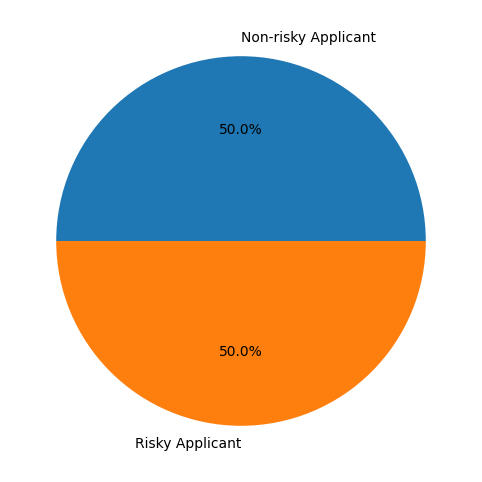

In [305]:
plt.figure(figsize=(8, 6))
plt.pie(y_train_resampled.value_counts(), labels=['Non-risky Applicant', 'Risky Applicant'], autopct='%1.1f%%')

### *Capping or Censoring Method*

In [306]:
# define low variation columns in normal_distributed_columns
low_var_cols_skewed = ['Married/Single', 'House_Ownership', 'Car_Ownership']

skewed_numeric_columns

['Married/Single', 'House_Ownership', 'Car_Ownership']

In [307]:
# Drop the low variation columns in skewed columns
for column in low_var_cols_skewed:
    skewed_numeric_columns.remove(column)

**Remove Columns with Low Variance - Explanation**  
To avoid value error and since `Married/Single`, `House_Ownership` and `Car_Ownership` is ordinal values, we will this column from being outlier handled and add it back later on, but since all of the columns with skewed distribution are removed, we don't need to cap any columns with skewed distribution.

In [308]:
# Capping Method for Normal Distribution  
winsorizer_normal_distribution = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_distribution.fit_transform(X_train_resampled)

# Transforming X_test
X_test_capped = winsorizer_normal_distribution.transform(X_test)

**Capping Normal Distribution Using Gaussian - Explanation**  
Using the code above we cap outliers using the Gaussian method for columns with normally distributed data, we will proceed to cap using the IQR method for skewed columns.

In [309]:
# Appending back low variation columns in skewed columns
for column in low_var_cols_skewed:
    skewed_numeric_columns.append(column)

In [310]:
def checkOutlier(df):
    cols = df.columns.tolist()
    label = ['Mean', 'Median', 'Mode', 'STDEV', 'Skewness', 'Q1', 'Q3', 'IQR', 'Lower Bound', 'Upper Bound', 'Outlier%']
    data = []
    
    for col in cols:
        stats = []
        
        df[col] = df[col].sort_values(ascending=True)
        stats.append(df[col].mean())                                        # 0 Mean
        stats.append(df[col].median())                                      # 1 Median
        stats.append(df[col].mode()[0])                                     # 2 Mode
        stats.append(df[col].std())                                         # 3 STDEV
        stats.append(df[col].skew())                                        # 4 Skewness
        stats.append(df[col].quantile(0.25))                                # 5 Q1
        stats.append(df[col].quantile(0.75))                                # 6 Q3
        stats.append(stats[6] - stats[5])                                   # 7 IQR
        
        if stats[4] > 0.5 or stats[4] < -0.5:                               # Skewed
            stats.append(stats[5] - 1.5*stats[7])                           # 8
            stats.append(stats[6] + 1.5*stats[7])                           # 9
        elif stats[4] <= 0.5 or stats[4] >= 0.5:
            stats.append(stats[0] - 3*stats[3])                             # 8
            stats.append(stats[0] + 3*stats[3])                             # 9
        
        stats.append(len(df[(df[col] > stats[9]) | (df[col] < stats[8])]) / len(df[col]) * 100)
        data.append(stats)
    
    statsdf = pd.DataFrame()
    statsdf['Stats'] = label
    
    for n in range(len(data)):
        statsdf[cols[n]] = data[n]
    
    return statsdf

In [311]:
pd.set_option('display.precision', 2)
checkOutlier(X_train).T


,0,1,2,3,4,5,6,7,8,9,10
Stats,Mean,Median,Mode,STDEV,Skewness,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier%
Income,4998887.420,5001124.000,9345456.000,2874615.852,0.007,2513457.000,7475446.000,4961989.000,-3624960.134,13622734.975,0.000
Age,49.961,50.000,27.000,17.059,-0.006,35.000,65.000,30.000,-1.216,101.138,0.000
Experience,10.080,10.000,6.000,6.006,-0.013,5.000,15.000,10.000,-7.938,28.097,0.000
Married/Single,0.898,1.000,1.000,0.303,-2.625,1.000,1.000,0.000,1.000,1.000,10.228
House_Ownership,1.891,2.000,2.000,0.393,-3.772,2.000,2.000,0.000,2.000,2.000,8.050
Car_Ownership,0.300,0.000,0.000,0.458,0.874,0.000,1.000,1.000,-1.500,2.500,0.000
Profession,25.271,25.000,37.000,14.736,-0.027,13.000,38.000,25.000,-18.937,69.479,0.000
CITY,158.127,157.000,312.000,92.267,0.007,78.000,238.000,160.000,-118.675,434.929,0.000
STATE,13.797,14.000,25.000,9.368,0.003,6.000,22.000,16.000,-14.305,41.900,0.000


**Checking outlier from each column**

From this dataframe we can see that Most of the column have no outlier, while the `Married/Single` and `House_Ownership` column have very small outlier percentage, each at 10.18% and 7.99%.

**Appending Low var Back to Its Columns**  
after capping we can append the removed columns back to each category to be further analyzed

In [312]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


**Visualizing Before and After Outlier Handling Function - Explanation**  
Due to the large number of columns to be plotted, I decided to create a function named `outlier_handling_plot_comparison` which takes three parameters:

- `df_before`: Pandas DataFrame containing data before outlier handling.
- `df_after`: Pandas DataFrame containing data after outlier handling.
- `variable`: A string representing the name of the variable/column to be plotted.

This function will create Histogram and Boxplot visualizations before and after outlier handling for all numerical columns.
I will demonstrate its usage with examples in the function's docstring in the following code.

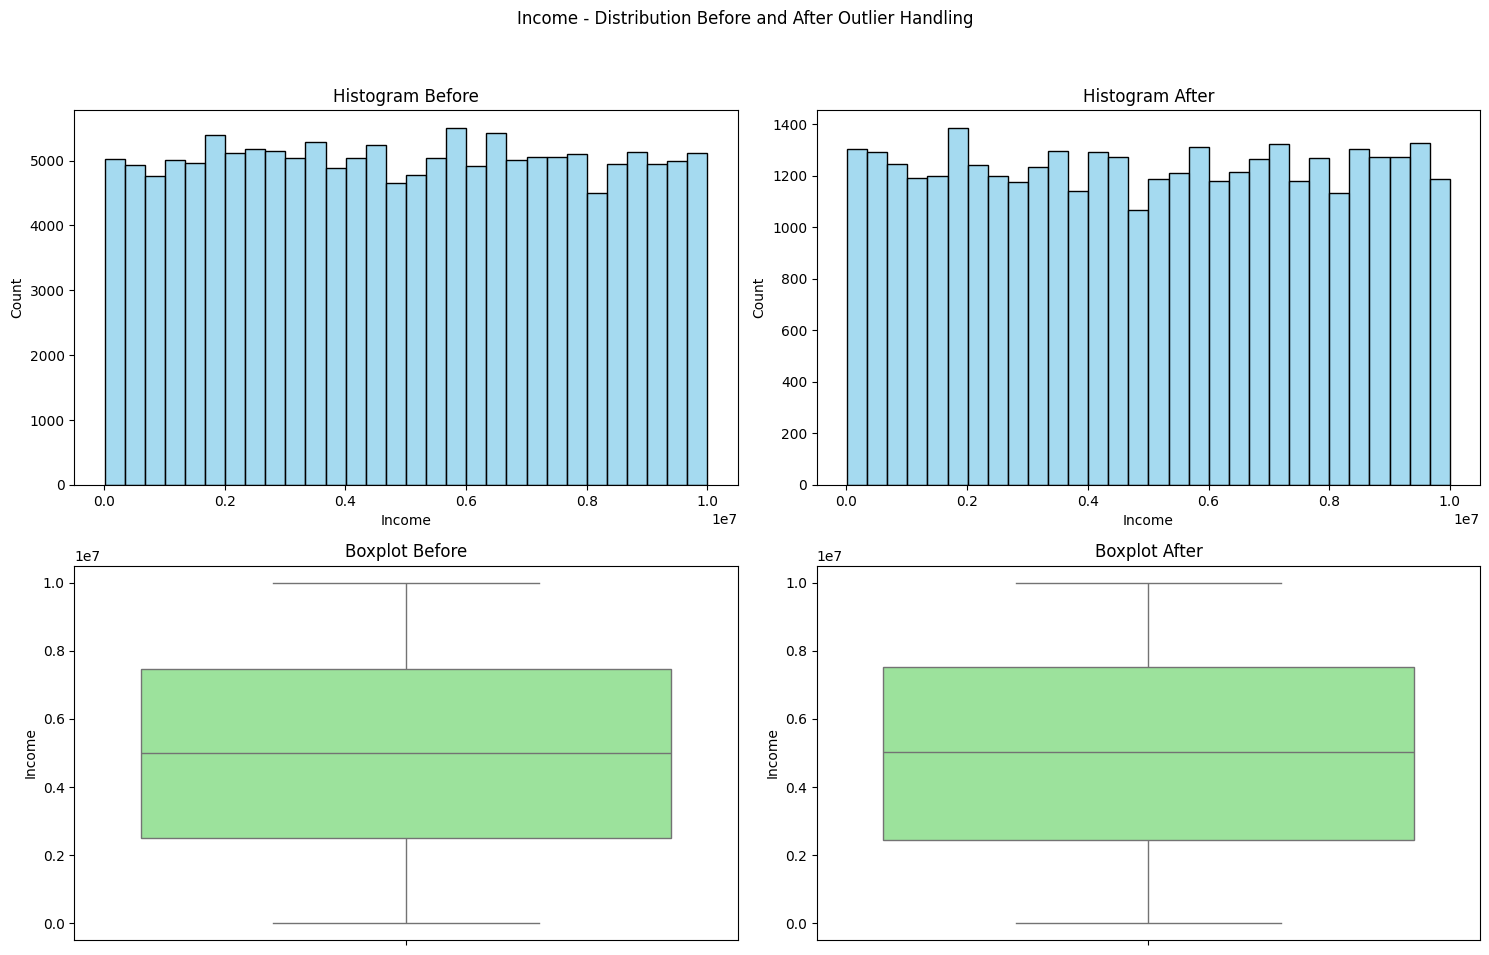

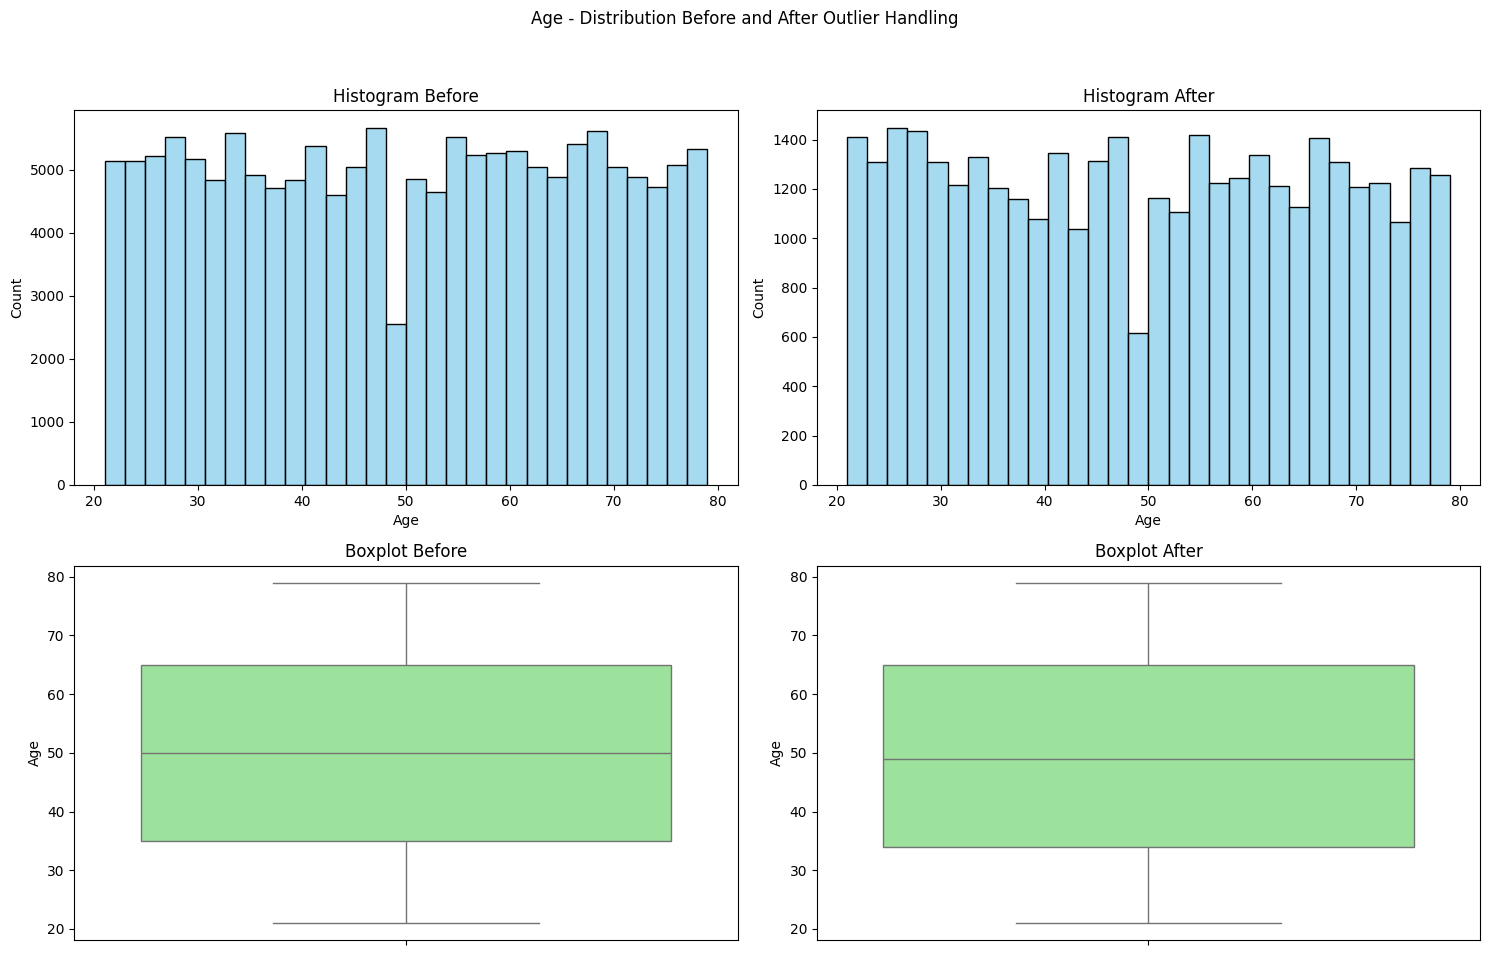

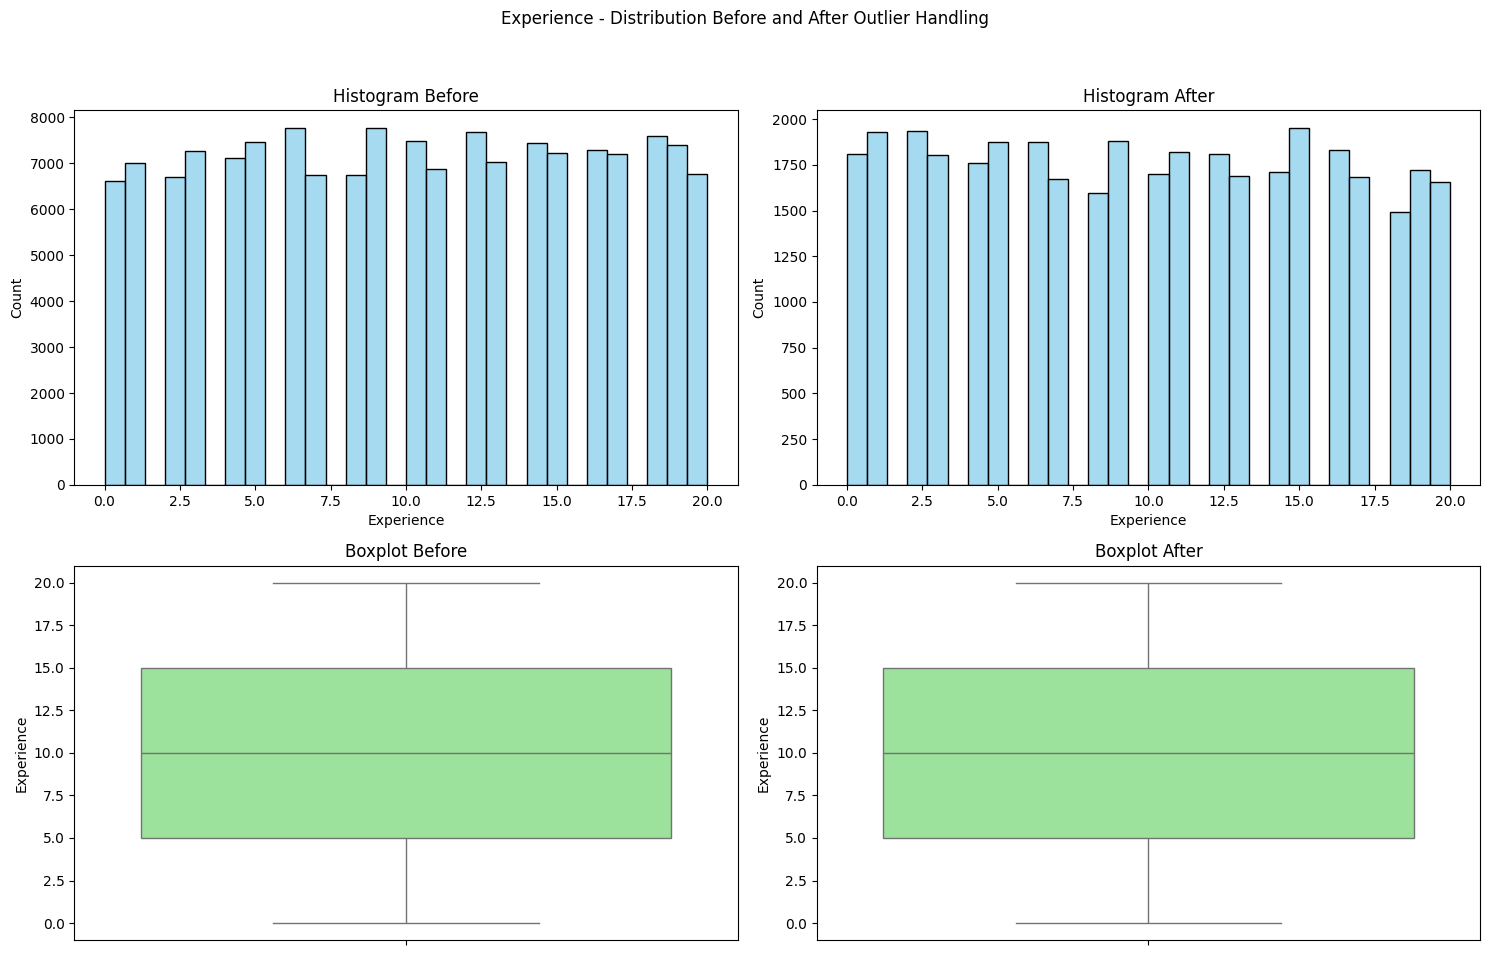

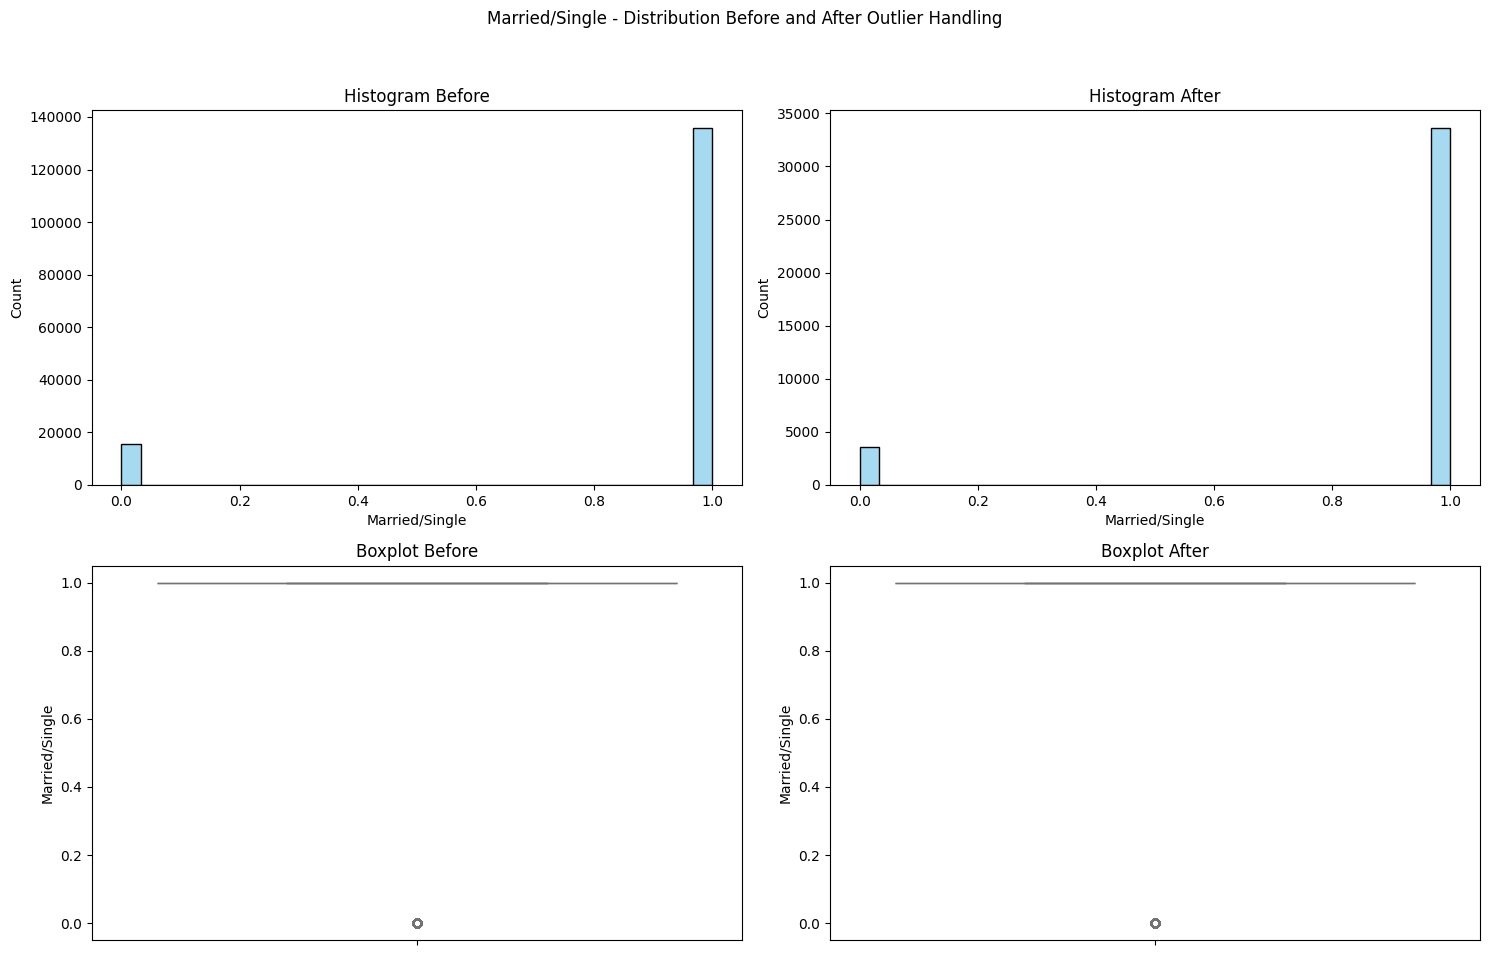

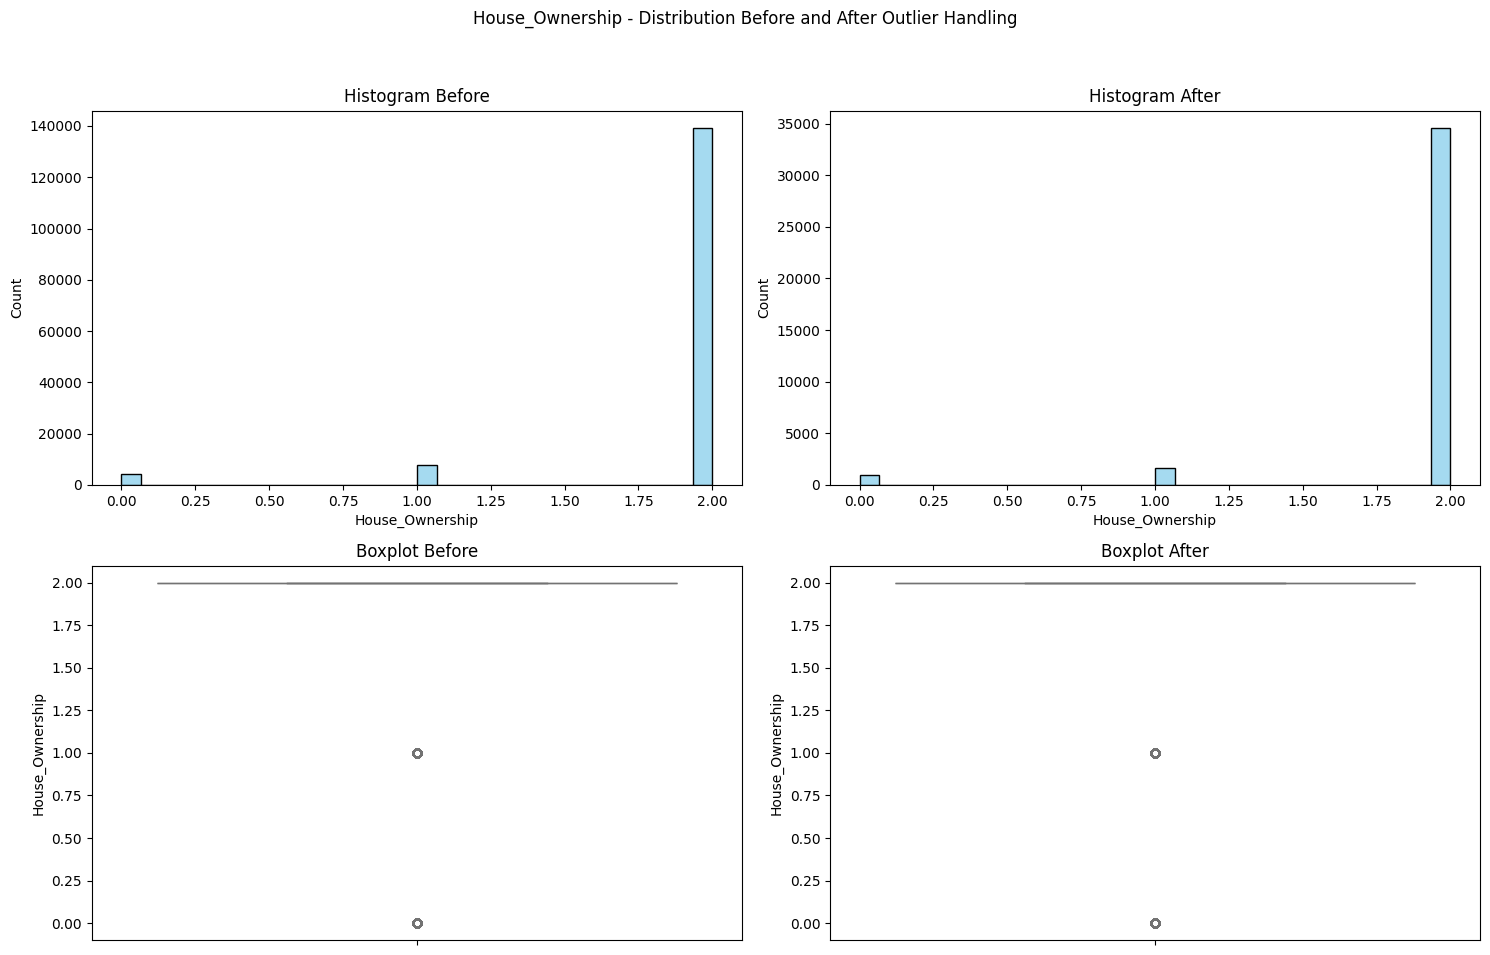

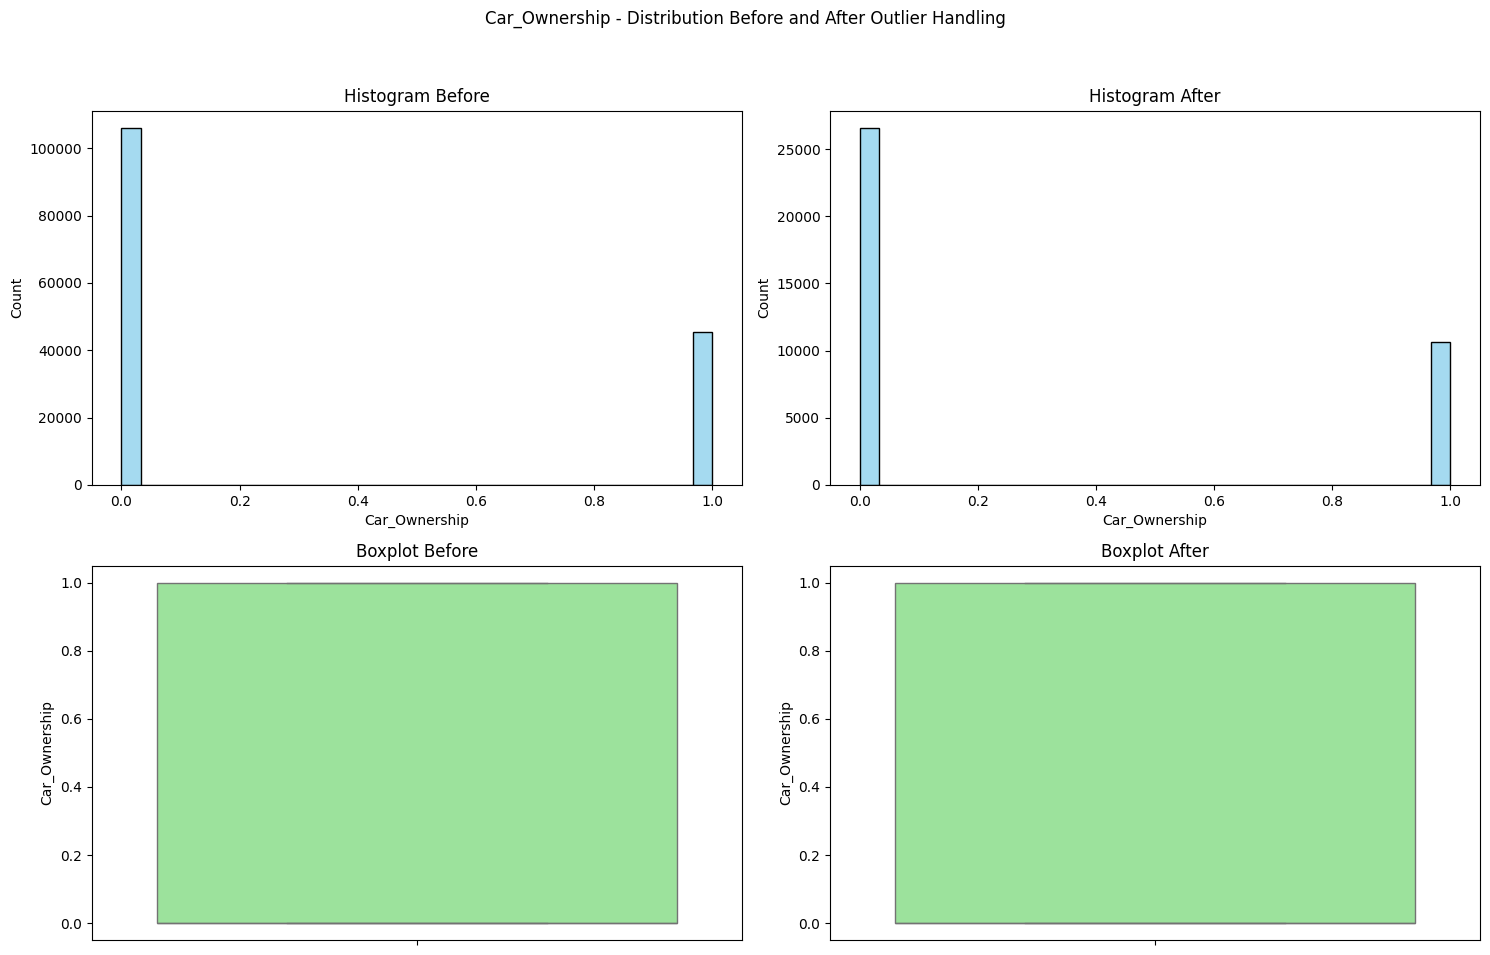

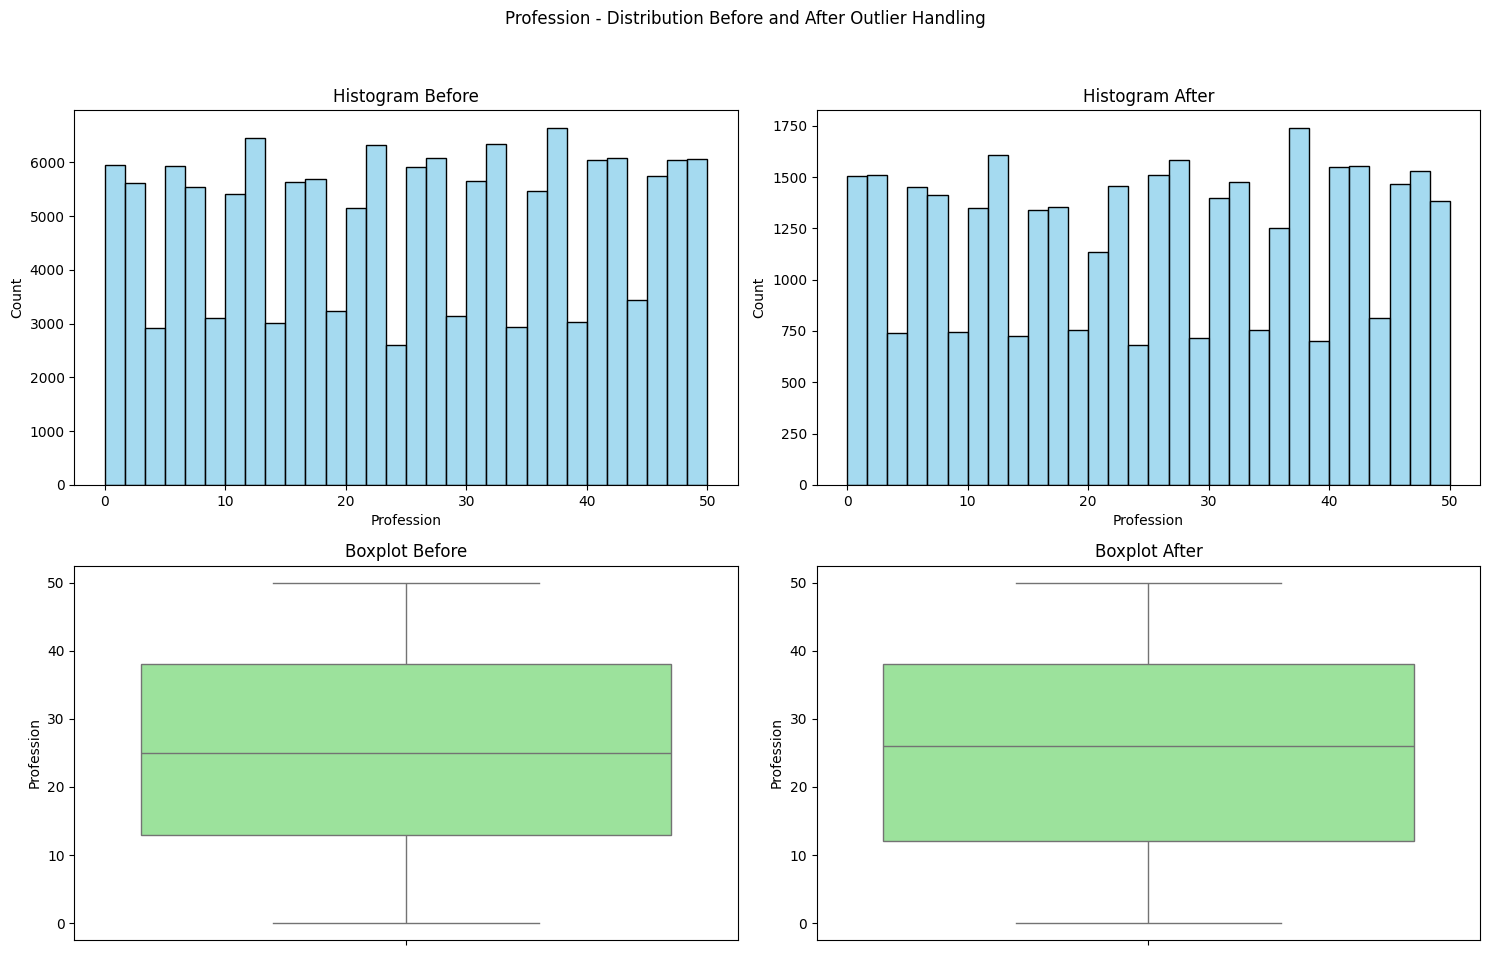

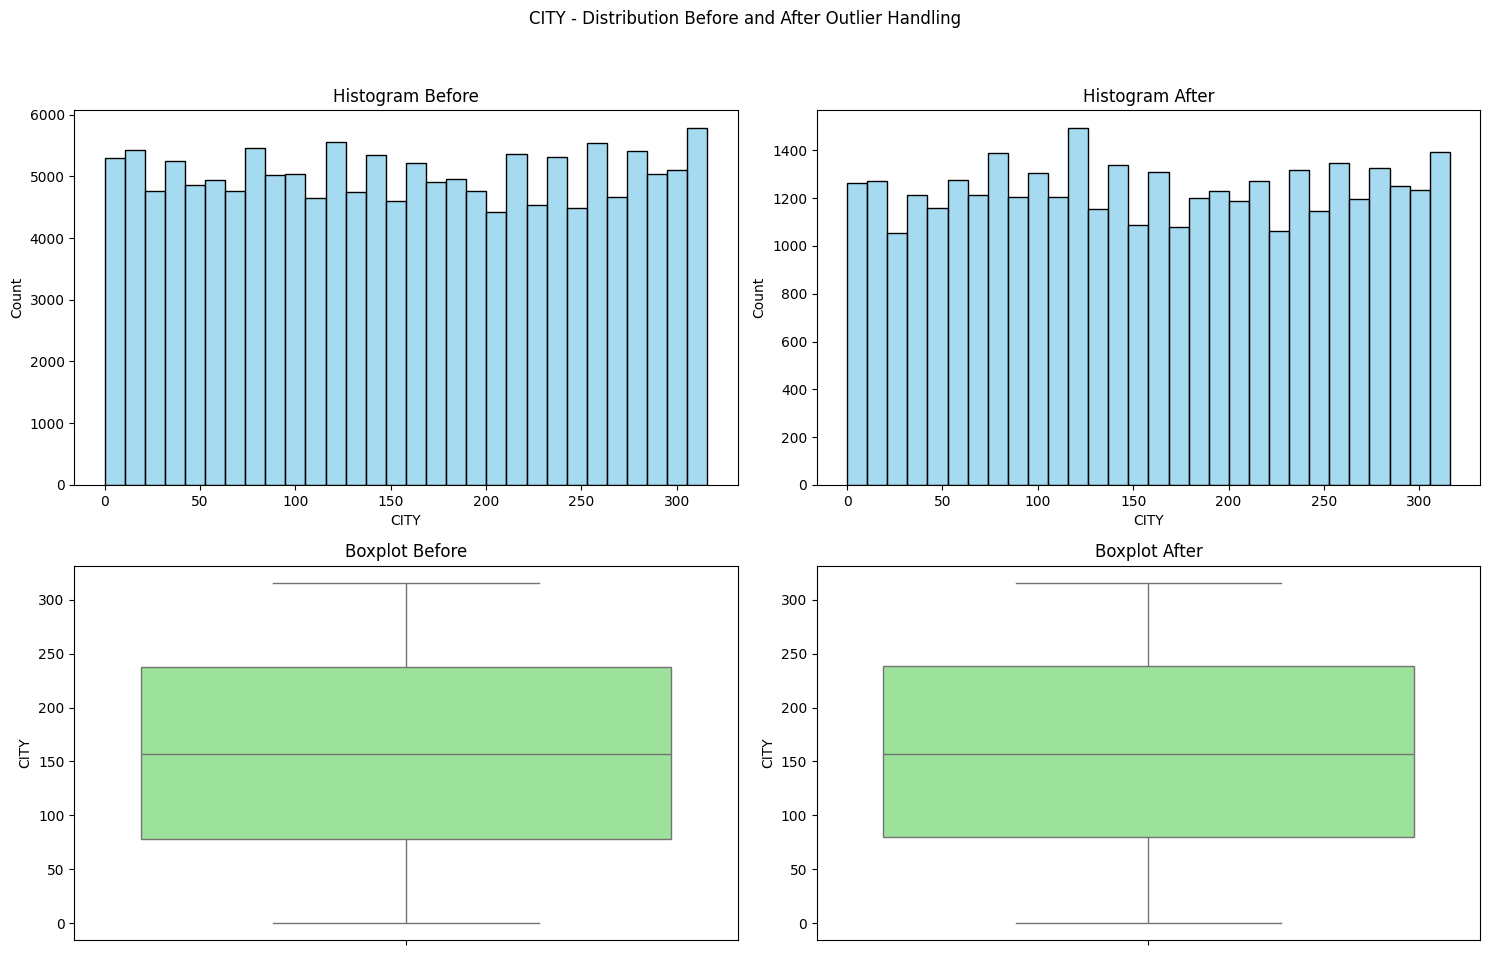

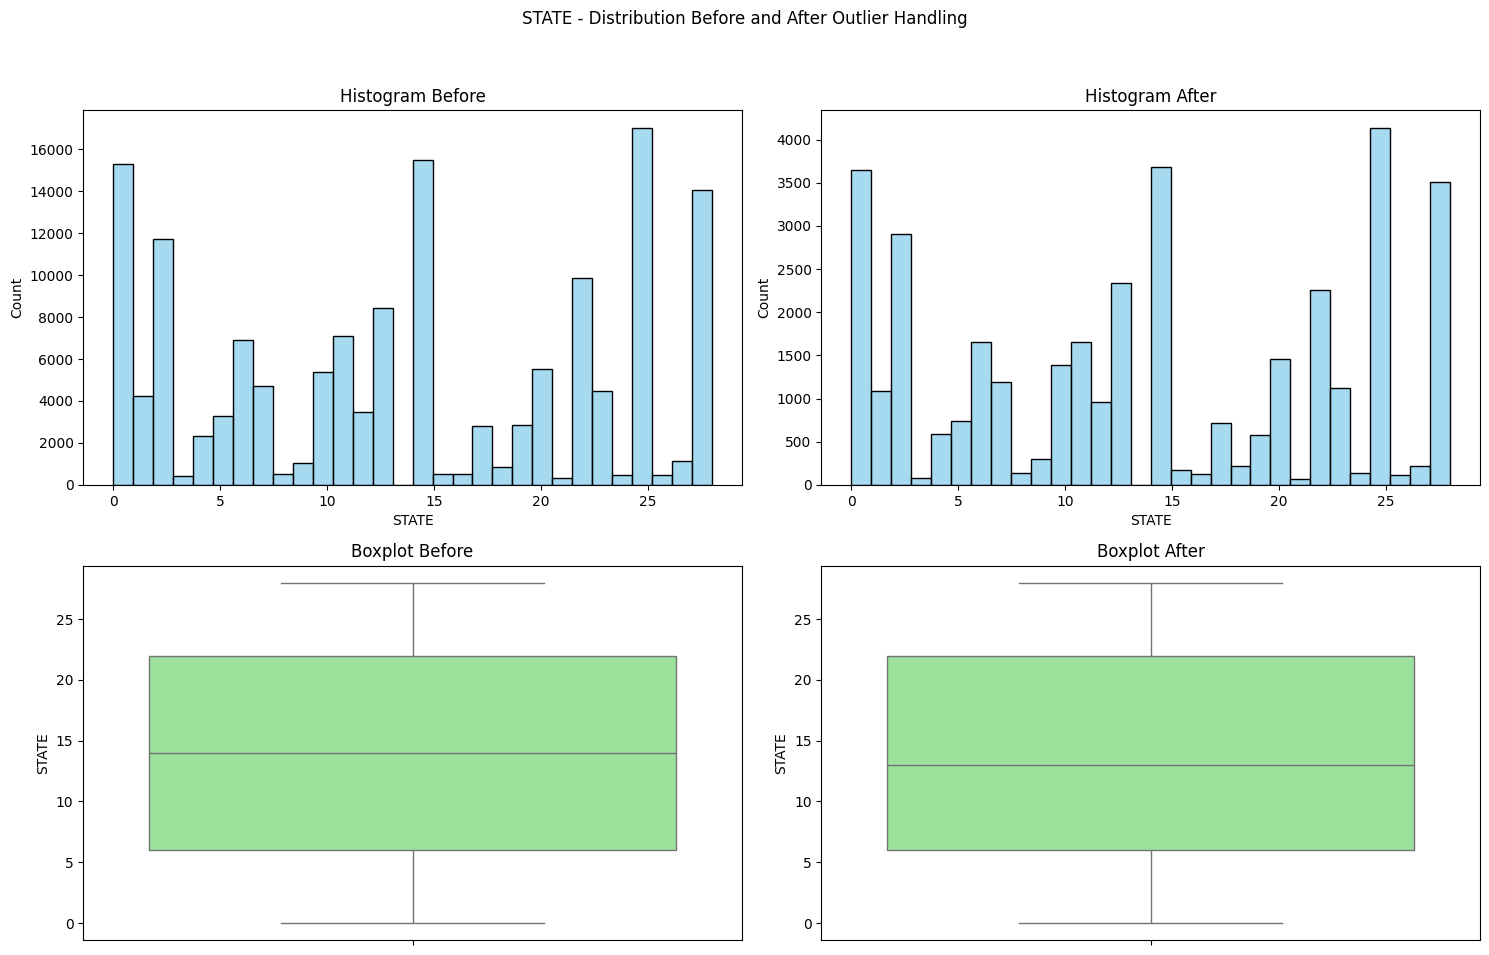

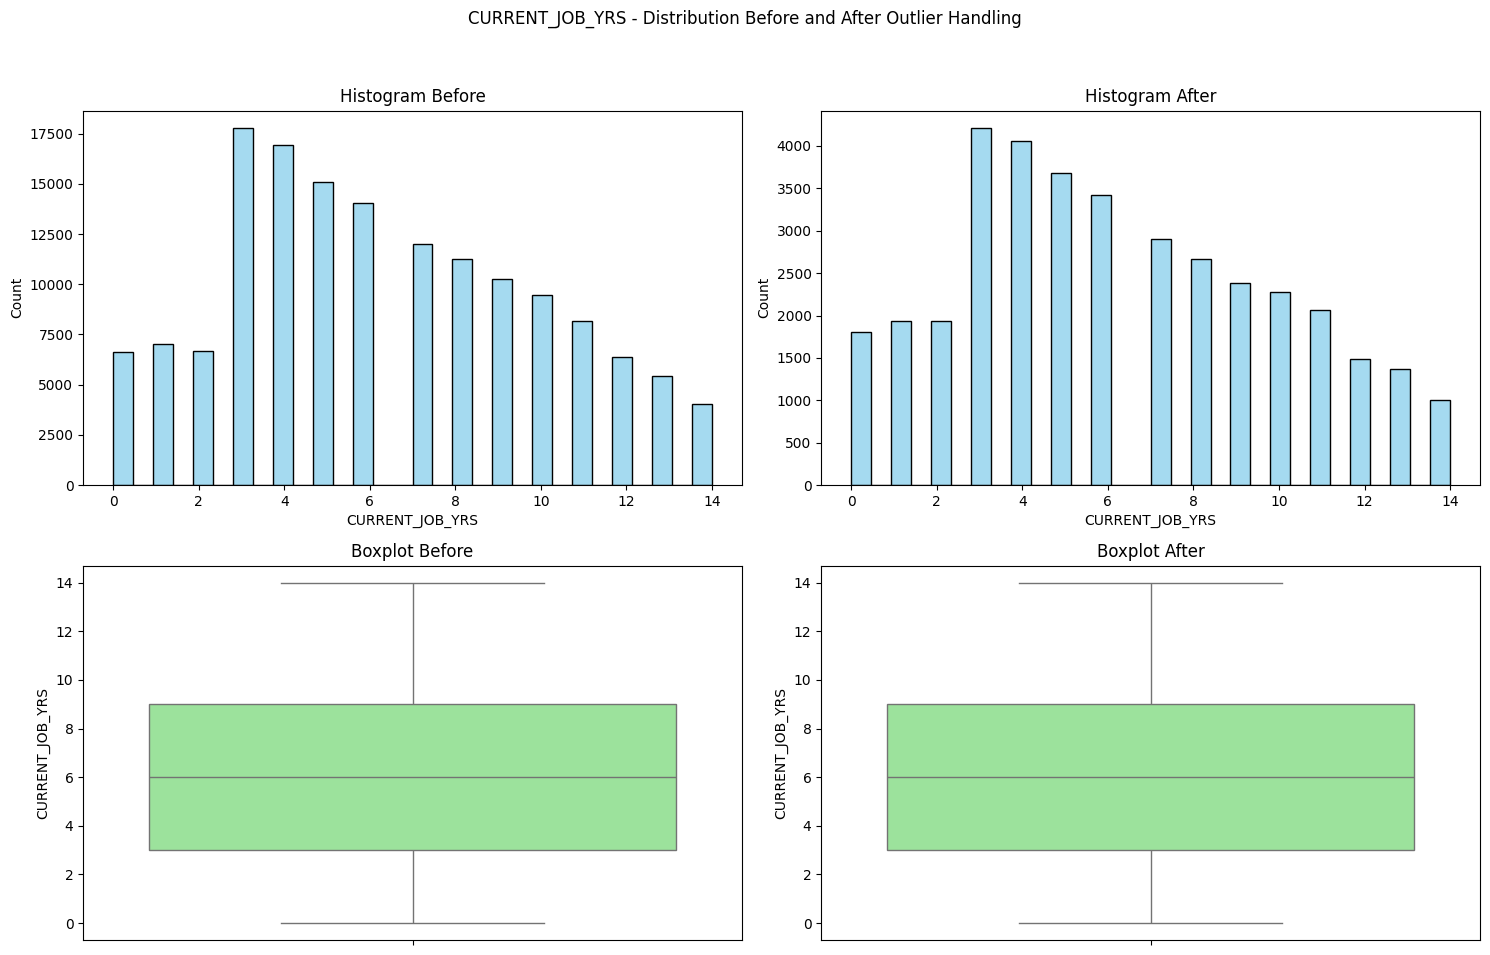

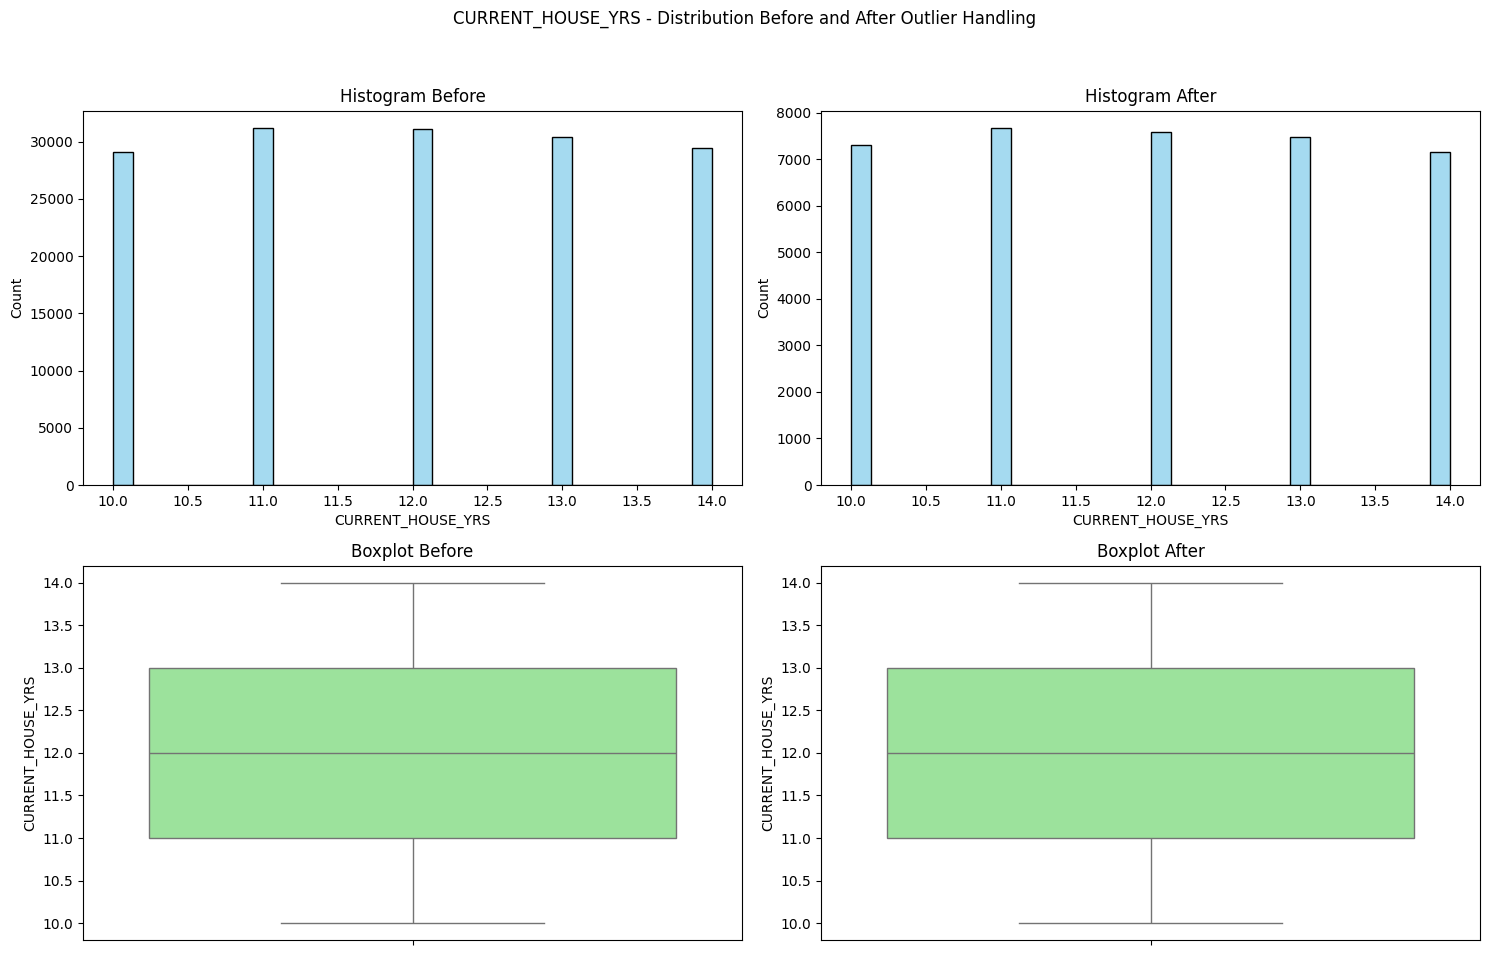

In [313]:
# Using the Function
num_cols = numeric_columns
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

**Explanation**  
After analyzing the visualizations, it appears that there are slight difference before and after outlier handling. Some insights I gathered include:
- Although there are 2 columns with outlier (which is `Married/Single` and `Car_Ownership`) there aren't any noticable difference before and after the outlier handling.
- All other columns seems unaffected because they had no outliers
- `Outlier capping has been successfully applied to intended numerical columns`.

Next, we can proceed with feature selection.

In [314]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

## Feature Selection

### *Correlation Between Continous Columns and Target*

In [315]:
# Define numerical continuous value columns
continuous_cols = num_cont_cols

# Values Container
spearman_coef = []
p_values = []
correlation = []
selected_continuous = []
not_selected_continuous = []

# Loop every column in numerical continous columns
for col in continuous_cols:
    corr, pvalue = spearmanr(X_train[col], y_train)

    if pvalue < 0.05:
        spearman_coef.append(corr)
        p_values.append(pvalue)
        selected_continuous.append(col)
        correlation.append('Correlated')
    else:
        spearman_coef.append(corr)
        p_values.append(pvalue)
        not_selected_continuous.append(col)
        correlation.append('Not Correlated')

pd.DataFrame({
    'continuous_columns': continuous_cols,
    'spearman_coef': spearman_coef,
    'p_values': p_values,
    'correlation': correlation
})

,continuous_columns,spearman_coef,p_values,correlation
0,Age,-0.024,0.000,Correlated
1,Income,-0.003,0.214,Not Correlated


**Continous Columns Correlations - Explanations**  

To test correlation, Spearman's rank correlation coefficient is chosen for its robustness to non-normal distributions and outliers, suitability for ordinal data, and ability to capture non-linear monotonic relationships, making it ideal for analyzing complex relationships in airline applicant satisfaction data.   The analysis revealed that `there are correlations between all the continuous columns and the target` variable which is customer satisfaction.

### *Correlation Between Discrete Columns and Target*

In [316]:
# Define numerical discrete value columns
discrete_cols = cat_disc_cols + num_disc_cols

# Values Container
kendall_coef = []
p_values = []
correlation = []
selected_discrete = []
not_selected_discrete = []

# Loop every column in numerical discrete columns
for col in discrete_cols:
    corr, pvalue = kendalltau(X_train[col], y_train)

    if pvalue < 0.05:
        kendall_coef.append(corr)
        p_values.append(pvalue)
        selected_discrete.append(col)
        correlation.append('Correlated')
    else:
        kendall_coef.append(corr)
        p_values.append(pvalue)
        not_selected_discrete.append(col)
        correlation.append('Not Correlated')

pd.DataFrame({
    'discrete_columns': discrete_cols,
    'kendall_coef': kendall_coef,
    'p_values': p_values,
    'correlation': correlation

})

,discrete_columns,kendall_coef,p_values,correlation
0,Married/Single,0.020,0.000,Correlated
1,House_Ownership,0.028,0.000,Correlated
2,Car_Ownership,-0.023,0.000,Correlated
3,Profession,-0.003,0.225,Not Correlated
4,CITY,0.004,0.037,Correlated
5,STATE,-0.002,0.299,Not Correlated
6,Experience,-0.029,0.000,Correlated
7,CURRENT_JOB_YRS,-0.016,0.000,Correlated
8,CURRENT_HOUSE_YRS,-0.005,0.019,Correlated


**Correlation Between Discrete Columns and Target - Explanation**  

Based on the analysis above `all discrete columns are correlated with the target`. Kendall Tau correlation was chosen because the features being analyzed in this section are categorical in nature, it's a measure of the strength and direction of the association between two variable and the method is more interpretable when it comes to understanding the ordinal association between variables.

### *Checking Multicollinearity*

In [317]:

# Make a copy of capped X_train just to make sure of multicollinearity test
X = X_train_capped.copy()

# Add a constant term to the predictor (required for the intercept term in the regression model)
X = add_constant(X)

# Create a DataFrame that will store the VIF for each variable
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


              feature     VIF
0               const 134.320
1              Income   1.001
2                 Age   1.002
3          Experience   1.829
4      Married/Single   1.001
5     House_Ownership   1.002
6       Car_Ownership   1.002
7          Profession   1.002
8                CITY   1.004
9               STATE   1.003
10    CURRENT_JOB_YRS   1.829
11  CURRENT_HOUSE_YRS   1.001


**Multicollinearity with VIF Test - Explanation**  

VIF, or Variance Inflation Factor, is a measure used to detect the presence of multicollinearity in regression analysis. Based on Multicollienarity checking above, we can see that:

- Constant Term (const): The VIF for the constant term is significantly higher than for the other variables. This is expected and not a concern as it does not indicate multicollinearity; rather, it reflects the variance associated with the intercept of the model.

- Low Multicollinearity for Most Features: Most features have VIF values well below 5, indicating that they do not suffer from severe multicollinearity. This suggests that each of these features provides unique information that is not redundantly encoded in the other features. For example, variables like Gender, Customer Type, Age, and Flight Distance have low VIF values (close to 1), implying they are relatively independent predictors.

- Moderate VIF Values: Some features, such as Type of Travel, Class, Inflight wifi service, Ease of Online booking, Seat comfort, Inflight entertainment, and Cleanliness, have VIF values between 2 and 3.9. These values suggest a moderate level of multicollinearity, but not to a degree that typically necessitates corrective action. However, these variables might share some amount of information, indicating overlapping influences on applicant satisfaction.

In summary, `the data appears to be in good shape for further analysis and modeling, with most variables showing low multicollinearity.` 

### Select Final Features and Drop Not Selected Features

In [318]:
# Define Selected Features
selected_final =  selected_continuous + selected_discrete

# Drop Not Selected Features
print(f'Drop columns: {not_selected_continuous + not_selected_discrete}')

# Make X Train and Test Final
X_train_final = X_train_capped[selected_final]
X_test_final = X_test_capped[selected_final]

display(X_train_final.head())
X_test_final.head()

Drop columns: ['Income', 'Profession', 'STATE']


,Age,Married/Single,House_Ownership,Car_Ownership,CITY,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
212903,60,1,2,1,45,10,5,11
93969,66,1,2,0,280,18,12,10
186270,59,1,2,0,187,14,14,14
200749,32,1,2,0,303,3,3,11
183984,21,1,2,0,162,18,8,12


,Age,Married/Single,House_Ownership,Car_Ownership,CITY,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
240491,52,1,2,0,93,2,2,14
51439,55,1,2,0,42,12,6,13
119710,61,1,2,0,88,11,11,11
206576,56,1,2,0,190,6,6,11
125754,41,1,2,1,292,0,0,14


**Select Final Features and Drop Not Selected Features - Explanation**  

Code above used to preparing a dataset for machine learning by selecting specific features for inclusion. Firstly, it combines selected continuous and discrete features into a single list called 'selected_final'. Then, it prints out the columns that are not selected for inclusion in the final dataset. In this case, since there aren't any not selected columns, the list would be empty. Subsequently, `it creates the final training and testing datasets ('X_train_final' and 'X_test_final')` by retaining only the features included in 'selected_final'.

In [319]:
# Grouping Selected Columns

selected_cat = ['Married/Single','House_Ownership', 'Car_Ownership']

selected_num = ['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

**Group Selected Columns**  

Since all the feature are selected and there are no feature column that are not selected, To streamline the feature engineering process, it's advisable to categorize columns based on their properties. Here, we'll group column names into two categories: those containing string/object categories (cat_cols) and those containing numerical categories (num_cols). This organization facilitates a more systematic approach to handling different types of features, making the feature engineering process more manageable.

## Scaling

In [320]:
# Checking the skew values in each column
X_train_capped.skew()

Income              -0.006
Age                  0.012
Experience           0.029
Married/Single      -2.734
House_Ownership     -4.025
Car_Ownership        0.944
Profession          -0.033
CITY                 0.008
STATE                0.013
CURRENT_JOB_YRS      0.285
CURRENT_HOUSE_YRS    0.014
dtype: float64

In [321]:
# Defining Scaler
scaler = StandardScaler()

scaler

StandardScaler()

**Defining Scaler - Explanation**  
The skewness values for 3 column are observed to be higher than 0.5 and lower than -0.5, suggesting 'skewed distribution on some columns`. Consequently, it is necessary to standardize the values to ensure uniformity across the dataset. So, I decided to use Standard Scaler `because it computes the mean and standard deviation of the data, making it less sensitive to outliers compared to Min-Max Scaler.

In [322]:
# Defining encoder
encoder = OneHotEncoder()

encoder


OneHotEncoder()

## Column Transformer

In [323]:
# Defining Column Transformer
transformer = ColumnTransformer([
    ('encoder', encoder, selected_cat),
    ('scaler', scaler, selected_num),
], remainder='drop'
)

transformer

ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                 ['Married/Single', 'House_Ownership',
                                  'Car_Ownership']),
                                ('scaler', StandardScaler(),
                                 ['Age', 'Experience', 'CURRENT_JOB_YRS',
                                  'CURRENT_HOUSE_YRS'])])

**Column Transformer - Explanation**  

A ColumnTransformer is defined, which is a preprocessing step commonly used in machine learning pipelines to `apply different transformations to different columns of the dataset`. The transformer is composed of two main steps: scaling numerical columns using the 'scaler' method specified earlier and encoding categorical columns using the 'encoder' method. The 'num_cols' and 'cat_cols' variables are used to specify which columns should undergo numerical scaling and categorical encoding, respectively. The 'remainder' parameter is set to 'passthrough', which means that any columns not explicitly mentioned will be passed through without any transformations. This ColumnTransformer encapsulates the preprocessing steps required for both numerical and categorical data, enabling seamless integration into the machine learning workflow.

# **6. Model Definition**  



**Model Definition - Introduction**  

A model definition in the context of supervised machine learning entails the specification of the structure, parameters, and algorithms that a computational system will utilize to learn patterns from labeled dataIn this part. This project will test 5 classification model algorithms with pipeline:

1. Logistic Regression
2. K-Nearest Neighbor (KNN) Classifier
3. Support Vector Classification (SVC)
4. Decision Tree Classifier
5. Random Forest Classifier
6. XGB Classifier

## Five Classification Base Model

### *2. KNN-Classifier Pipeline*

kval with 1 neighbors: 0.8767724867724868
kval with 2 neighbors: 0.8846626984126985
kval with 3 neighbors: 0.8867129629629629
kval with 4 neighbors: 0.8895502645502644
kval with 5 neighbors: 0.8893783068783071
kval with 6 neighbors: 0.8903108465608465
kval with 7 neighbors: 0.8900661375661375
kval with 8 neighbors: 0.89021164021164
kval with 9 neighbors: 0.890628306878307
kval with 10 neighbors: 0.8903571428571428
kval with 11 neighbors: 0.8913161375661376
kval with 12 neighbors: 0.8906944444444445
kval with 13 neighbors: 0.8911375661375661
kval with 14 neighbors: 0.8912632275132276
kval with 15 neighbors: 0.8908597883597883
kval with 16 neighbors: 0.8907010582010584
kval with 17 neighbors: 0.8904828042328041
kval with 18 neighbors: 0.890403439153439
kval with 19 neighbors: 0.8897089947089947
kval with 20 neighbors: 0.8898214285714285
kval with 21 neighbors: 0.8892526455026456
kval with 22 neighbors: 0.8891269841269841
kval with 23 neighbors: 0.8887764550264551
kval with 24 neighbors: 

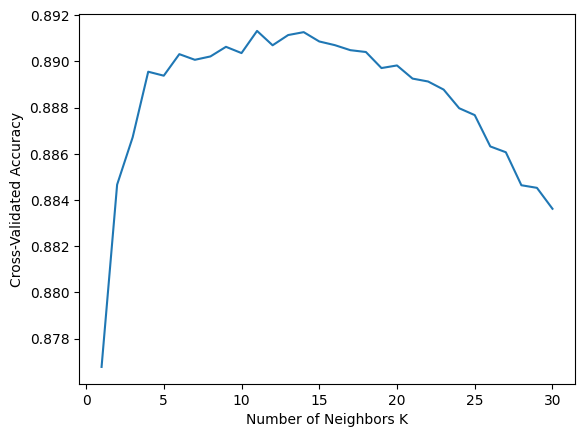

In [325]:
# Define range of k values
k_values = range(1, 31)
cv_scores = []
optimal_k = 0

# Perform 10-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"kval with {k} neighbors: {scores.mean()}")

# Determine the best k

optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")
# Plot the results
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

**Explanation**

The code above calculates the optimal number of n_neighbors we need to put when declaring KNN-Classifier. From the graph we can see that the line rapidly increases as the numbers of neighbors K increase, and reaching the most optimal number at 11, and then the graph gradually drecreases since then.

In [326]:
# Define KNN-Classifier Base Model
knn_class = KNeighborsClassifier(n_jobs=-1, n_neighbors=optimal_k)

# Defining the pipeline model
knn_class_pipe = Pipeline([
    ('transformer', transformer),
    ('knn_class', knn_class)
])

knn_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('knn_class', KNeighborsClassifier(n_jobs=-1, n_neighbors=11))])

**KNN Classifier Base Model Pipeline - Explanation**

The code defines a K-Nearest Neighbors (KNN) classifier base model within a pipeline with preprocessing transformers. KNN is a simple, instance-based learning algorithm where the class of a sample is determined by the majority class among its k nearest neighbors. Below are Advantage and Disadvantage of KNN models.
- **Advantages**:
  - Simple and Effective: KNN is straightforward to implement and understand. It can be very effective for large datasets with few irrelevant features.
  - No Model Assumptions: It doesn't make any assumptions about the underlying data distribution, which is beneficial in real-world scenarios where data may not follow theoretical assumptions.
- **Disadvantages**:
  - Computationally Expensive: KNN is computationally intensive, especially as the dataset size grows, because it searches for the nearest neighbors for each query.
  - Sensitive to Irrelevant Features: Performance can degrade with the presence of irrelevant features since distance measurements become less meaningful.

### *2. Support Vector Classification (SVC) Pipeline*

In [327]:
# Defining SVC Base Model
svc = SVC()

# Defining the pipeline model
svc_pipe = Pipeline([
    ('transformer', transformer),
    ('svc', svc)
])

svc_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('svc', SVC())])

**Support Vector Classifier (SVC) Base Model Pipeline - Explanation**

The code defines a Support Vector Classifier (SVC) base model within a pipeline with preprocessing transformers. SVC is classifying model of, SVM a powerful classifier that works by finding the hyperplane that best separates different classes in the feature space. Below are advantage and disadvantage of SVM model.
- **Advantages**:
  - Effective in High Dimension: Works well in high-dimensional spaces, making it suitable for datasets with many features, such as customer feedback and flight details.
  - Kernel Trick: Can model non-linear boundaries using the kernel trick, allowing it to capture complex relationships.
- **Disadvantages**:
  - Scalability: SVMs can be slow to train on very large datasets, which might be a constraint if the dataset includes a vast number of airline applicants.
  - Parameter Selection: Choosing the right kernel and parameters (like C and gamma) can be challenging and requires cross-validation, which can be time-consuming.

### *3. Decision Tree Classifier Pipeline*

In [328]:
# Defining Decision Tree Classifier Base Model
dt_class = DecisionTreeClassifier()

# Defining the pipeline model
dt_class_pipe = Pipeline([
    ('transformer', transformer),
    ('dt_class', dt_class)
])

dt_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('dt_class', DecisionTreeClassifier())])

**Decision Tree Classifier Base Model Pipeline - Explanation**

The code defines a Decision Tree Classifier base model within a pipeline with preprocessing transformers. Decision tree is a flowchart-like tree structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. Below are the advantages and disadvantages of using decision tree.
- **Advantages**:
  - Easy to Interpret: Trees can be visualized, making them easy to interpret and understand, which is beneficial for reporting and decision-making.
  - Handles Non-Linear Data: Can easily handle qualitative (categorical) and quantitative (numerical) data and model non-linear relationships.
- **Disadvantages**:
  - Overfitting: Without proper tuning (like pruning), trees can create overly complex models that do not generalize well outside the training data.
  - Variance: Small changes in the data can result in a completely different tree, leading to high variance if not managed with techniques like ensemble learning.

### *4. Random Forest Classifier Pipeline*

k1 done
k2 done
k3 done
k4 done
k5 done
k6 done
k7 done
k8 done
k9 done
k10 done
k11 done
k12 done
k13 done
k14 done
k15 done
k16 done
k17 done
k18 done
k19 done
k20 done
k21 done
k22 done
k23 done
k24 done
k25 done
k26 done
k27 done
k28 done
k29 done
k30 done
k31 done
k32 done
k33 done
k34 done
k35 done
k36 done
k37 done
k38 done
k39 done
k40 done
k41 done
k42 done
k43 done
k44 done
k45 done
k46 done
k47 done
k48 done
k49 done
k50 done
The optimal number of neighbors is 11


Text(0, 0.5, 'Testing Accuracy')

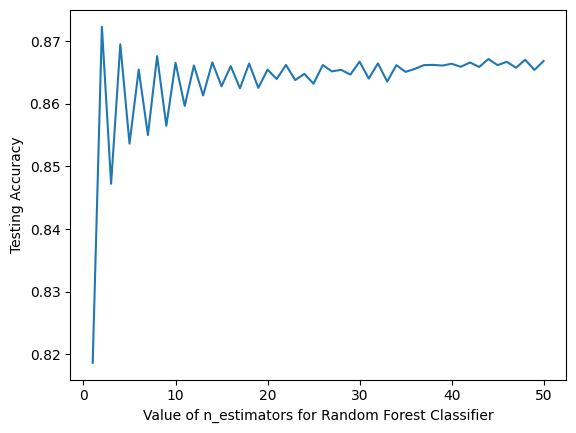

In [329]:
from sklearn.ensemble import RandomForestClassifier

scores = []
nvals = range(1, 51)

for k in nvals:
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train_final, y_train_resampled)
    y_pred = rfc.predict(X_test_final)
    scores.append(accuracy_score(y_test, y_pred))
    print(f'k{k} done')

optimal_k = nvals[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 51), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [330]:
# Defining the model
rf_class = RandomForestClassifier(n_estimators=11, n_jobs=-1)


In [331]:

# Defining the pipeline model
rf_class_pipe = Pipeline([
    ('transformer', transformer),
    ('rf_class', rf_class)
])

rf_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('rf_class',
                 RandomForestClassifier(n_estimators=11, n_jobs=-1))])

**Random Forest Classifier Base Model Pipeline - Explanation**

The code defines a Random Forest Classifier base model within a pipeline with preprocessing transformers. Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees. Below are the advantage and disadvantage of using Random Forest.
- **Advantages**:
  - Reduces Overfitting: By averaging multiple trees, it reduces the risk of overfitting, making it more robust than a single decision tree.
  - Handles Unbalanced Data: Effective in cases of unbalanced data distribution, such as unequal numbers of risky and non-risky applicants.
- **Disadvantages**:
  - Model Complexity: More complex than a single decision tree, making it harder to interpret.
  - Computationally Expensive: Requires more computational resources and time to train compared to a decision tree, especially as the number of trees increases.

### *5. Boosting Algorithm (XGB Classifier) Pipeline*

In [332]:
# Defining the model
xgb_class = XGBClassifier()

# Defining the pipeline model
xgb_class_pipe = Pipeline([
    ('transformer', transformer),
    ('xgb_class', xgb_class)
])

xgb_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('xgb_class',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

**Boosting Algorithm (XGBoost Classifier) Base Model Pipeline - Explanation**

The code defines a XGB Classifier base model within a pipeline with preprocessing transformers. Boosting is an ensemble technique that creates a strong classifier from a number of weak classifiers. It does this by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Below are the advantage and disadvantage of using booster.
- **Advantages**:
  - Improves Accuracy: Often provides significant accuracy improvements over single models and even other ensemble methods.
  - Handles Variance and Bias: Can reduce both bias and variance by combining multiple weak learners.
- **Disadvantages**:
  - Overfitting Risk: If not properly tuned, boosting can lead to overfitting, especially in noisy datasets.
  - Computationally Demanding: Training can be time-consuming due to the sequential nature of boosting, making it less scalable for very large datasets.

# **7. Model Training**

## KNN Classifier

In [333]:
# Fitting KNN Classifier to training data
knn_class_pipe.fit(X_train_final, y_train_resampled)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('knn_class', KNeighborsClassifier(n_jobs=-1, n_neighbors=11))])

**Fitting KNN Classifier - Explanation**  
The code above fits the KNN Classifier pipeline model knn_class_pipe to the training data X_train_final, y_train.

## Support Vector Classification (SVC)

In [334]:
# Fitting SVC to training data
svc_pipe.fit(X_train_final, y_train_resampled)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('svc', SVC())])

**Fitting SVC - Explanation**  
The code above fits the SVC pipeline model svc_pipe to the training data X_train_final, y_train.

## Decision Tree Classifier

In [335]:
# Fitting Decision Tree Classifier to training data
dt_class_pipe.fit(X_train_final, y_train_resampled)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('dt_class', DecisionTreeClassifier())])

**Fitting Decision Tree Classifier - Explanation**  
The code above fits the Decision Tree Classifier pipeline model dt_class_pipe to the training data X_train_final, y_train.

## Random Forest Classifier

In [336]:
# Fitting Random Forest Classifier to training data
rf_class_pipe.fit(X_train_final, y_train_resampled)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('rf_class',
                 RandomForestClassifier(n_estimators=11, n_jobs=-1))])

**Fitting Random Forest Classifier - Explanation**  
The code above fits the Random Forest Classifier pipeline model rf_class_pipe to the training data X_train_final, y_train.

## XGB Classifier

In [337]:
# Fitting XGBClassifier to training data
xgb_class_pipe.fit(X_train_final, y_train_resampled)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('xgb_class',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

**Fitting XGBClassifier - Explanation**  
The code above fits the XGBClassifier pipeline model rf_class_pipe to the training data X_train_final, y_train.

# **8. Model Evaluation**

## Metric Used - **F1 Score**


For this project, we aim to predict Japan's Airlines applicant Satisfaction, where a satisfaction value of 0 signifies neutrality or dissatisfaction, while 1 indicates satisfaction. `We have chosen to use the F1 Score as our primary metric for evaluation`. Here's why:

1. **Precision Importance:** Precision becomes crucial when the cost of false positives is high. For instance, if the airline implements costly actions based on predictions of dissatisfaction, it's imperative that these predictions are accurate to avoid unnecessary expenses.

2. **Recall Importance:** Recall is equally crucial when the cost of false negatives outweighs that of false positives. Missing out on identifying disrisky customers could significantly damage the airline's reputation and customer loyalty, which directly impact profitability.

3. **Balancing Precision and Recall:** The F1 Score strikes a balance between precision and recall by taking their harmonic mean. This balance is valuable when you need to consider both metrics simultaneously, especially in scenarios with uneven class distributions.

By using the F1 Score, you ensure that your model achieves a balance between accurately identifying disriskytomers (precision) and not missing any of them (recall), ultimately leading to better predictions of Japan's Airlines applicant Satisfaction. In conclusion, we opt for the F1 Score metric because `it effectively balances precision and recall`.

## Evaluation Functions 

### *Train Test Score Function*

In [338]:
def train_test_score(modelName, model, isTuned=False):
    """
    Function to display the train and test score from the corresponding model.

    Parameters:
    modelName (str): Name of the model.
    model: The machine learning model.
    isTuned (bool): Flag indicating whether the model is tuned or not. Default is False.

    Returns:
    None
    """
    if not isTuned:
        print(f'{modelName} Base Model Score')
    else:
        # Displaying the train and test score for tuned model
        print(f'Tuned {modelName} Model Score')
        # Example: Best hyperparameters for svc
        if hasattr(model, 'best_params_'):
            best_params = model.best_params_
            print(f'Best params for {modelName}: {best_params}')

    train_score = round(model.score(X_train_final, y_train_resampled), 4)
    test_score = round(model.score(X_test_final, y_test), 4)
    print('Training Score:', train_score)
    print('Testing Score:', test_score)

# Example usage:
# Assuming X_train_final, X_test_final, y_train, and y_test are defined
# Also assuming modelName and model are defined with appropriate values
# train_test_score(modelName, model, isTuned=False)


**Train & Test Function - Explanation**  
This functionhelps us see how well a machine learning model is performing on training and testing data. We just give it the name of the model and the model itself, and it tells you the scores. If we've tuned the model, it shows you the best settings too. It calculates the scores based on how accurately the model predicts outcomes from the training and testing data, and then prints those scores for you to see.

### *Metric Score Function*

In [353]:
# Function to display the metrics score from the corresponding model
from sklearn.metrics import precision_score, recall_score, f1_score

def metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False):
    if not isTuned:
        print(f'{modelName} Base Model Score')
    else:
        print(f'{modelName} Tuned Model Score')
    print()
    
    # Compute precision, recall, and F1 scores for training and testing sets
    precision_train = precision_score(y_train_resampled, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    recall_train = recall_score(y_train_resampled, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    f1_train = f1_score(y_train_resampled, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    print('Precision')
    print('Train Set:', precision_train)
    print('Test Set:', precision_test, '\n')
    
    print('Recall')
    print('Train Set:', recall_train)
    print('Test Set:', recall_test, '\n')
    
    print('F1 Score')
    print('Train Set:', f1_train)
    print('Test Set:', f1_test, '\n')

    return precision_train, precision_test, recall_train, recall_test, f1_train, f1_test

# Example usage:
# Assuming y_train, y_test, y_pred_train, y_pred_test, and modelName are defined
# metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False)

**Metric Score Function - Explanation**  

This function helps us understand how well a classification model is performing by showing three important metrics: precision, recall, and F1 score. For each of these metrics, it calculates values for both the training and testing sets. Precision tells us the accuracy of positive predictions, recall tells us how many of the actual positives the model captures, and F1 score is a combination of both precision and recall. By looking at these scores, we can judge how effective our model is in correctly identifying classes. If the model has been tuned, it indicates that in the output. Overall, this function is useful for quickly gauging the performance of a classification model.

### *Cross Validation Function*

In [340]:
# Function to display the cross validation score 

def cross_validation_f1_score(modelName, model, isTuned=False):
    if not isTuned:
        print(f'{modelName} Base Model Cross Validation Score')
    else:
        print(f'{modelName} Tuned Model Cross Validation Score')
    print()

    # Define the F1 score scorer
    f1_scorer = make_scorer(f1_score)

    # Perform cross-validation
    cv_scores_f1 = cross_val_score(model, X_train_final, y_train_resampled, scoring=f1_scorer, cv=5, n_jobs=-1)

    # Display the results
    print('F1 Score')
    print(f'F1 Score - All - Cross Validation: {cv_scores_f1}')
    print(f'F1 Score - Mean - Cross Validation: {cv_scores_f1.mean()}')
    print(f'F1 Score - Std - Cross Validation: {cv_scores_f1.std()}')

# Example usage:
# Assuming X_train_final, y_train, modelName, and model are defined
# cross_validation_f1_score(modelName, model, isTuned=False)

**Cross Validation Function - Explanation**  

This function evaluates a model's performance using cross-validation. It specifically focuses on the F1 score, which is a combination of precision and recall. This function calculates the F1 scores for different folds of the training data and prints out the average F1 score along with its standard deviation. It's a useful tool for understanding how well a model generalizes to new data and how consistent its performance is across different subsets of the training data.


## Base Model Evaluation

### *Logistic Regression*

#### *KNN Train & Test Score*

In [348]:
# Train and Test Score for Base Model
train_test_score("KNN Classifier", knn_class_pipe)

KNN Classifier Base Model Score
Training Score: 0.801
Testing Score: 0.7632


**Train and Test Score KNN Classifier Base Model - Insights**  
The KNN classifier base model demonstrates strong performance with the testing score (0.7632) is close to the training score (0.801) suggests that the model generalizes well to new, unseen data. There is no significant overfitting or underfitting.

#### *KNN Metric Score*

In [ ]:
# Predict using base model
y_knn_class_train_pred = knn_class_pipe.predict(X_train_final)
y_knn_class_test_pred = knn_class_pipe.predict(X_test_final)

In [354]:
# Metric Score
knn_class_precision_train, knn_class_precision_test, knn_class_recall_train, knn_class_recall_test, knn_class_f1_train, knn_class_f1_test = metrics_score ('KNN Classifier', y_knn_class_train_pred, y_knn_class_test_pred)

KNN Classifier Base Model Score

Precision
Train Set: 0.8020175864487241
Test Set: 0.3149438637243515 

Recall
Train Set: 0.7993870308635337
Test Set: 0.7873850621067914 

F1 Score
Train Set: 0.8007001481082536
Test Set: 0.44992395262017787 



**Metric Score KNN Classifier Base Model Score - Insights**  

Based on the performance metrics of the KNN Classifier base model, we can make several insights regarding Japan's Airline's applicant Satisfaction prediction using this model: 

1. **Precision**: The precision score indicates how accurate the model is in predicting risky loan applicants.
2. **Recall**: The recall score reflects the model's ability to capture all risky applicants correctly.
3. **F1 Score**: The F1 score combines both precision and recall, providing a balance between the two metrics. 

- Train Set:

    - Precision: 0.802
    - Recall: 0.799
    - F1 Score: 0.801

- Test Set:

    - Precision: 0.315
    - Recall: 0.787
    - F1 Score: 0.450

The model performs significantly better on the training set compared to the test set, indicating potential overfitting. The precision on the test set is quite low compared to the training set, suggesting that the model may be making a large number of false positive predictions. The recall on the test set is relatively high, indicating that the model is good at capturing positive instances, but this seems to come at the expense of precision. The F1 score, which balances precision and recall, also reflects this trade-off.

#### *KNN Confusion Matrix*

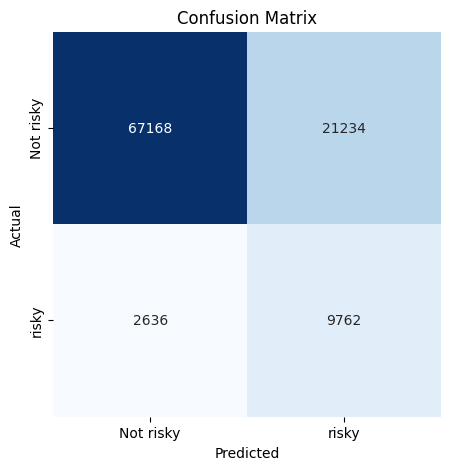

In [355]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_knn_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not risky', 'risky'], 
            yticklabels=['Not risky', 'risky'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix KNN Classifier Base Model - Insights**  

- **TP (True Positives)**: 15,049 cases correctly predicted satisfaction, indicating effectiveness in identifying risky applicants.
  
- **TN (True Negatives)**: 21,196 cases correctly predicted dissatisfaction, showing proficiency in recognizing non-risky applicants.

- **FP (False Positives)**: 840 cases incorrectly predicted satisfaction, suggesting some dissatisfaction was misclassified.

- **FN (False Negatives)**: 1,879 cases where satisfaction was missed, representing missed opportunities.

**Recall**: Relatively high recall for satisfaction, though affected by false negatives.

There are room for improvement, especially in reducing false negatives, through hyperparameter tuning. Model still bias towards predicting non-satisfaction evident from lower false positive count.

### *KNN Cross Validation Score*

In [ ]:
# Display Cross Validation Score 
cross_validation_f1_score('KNN Classifier', knn_class_pipe)

KNN Classifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.7561164  0.77504147 0.76136944 0.75806657 0.76688062]
F1 Score - Mean - Cross Validation: 0.7634949014265311
F1 Score - Std - Cross Validation: 0.006829536474335296


**Cross Validation KNN Classifier Base Model - Insights**  

The cross-validated F1 scores of the KNN classifier for Japan Airlines applicant Satisfaction reveal:

- **Consistency**: Stable performance across folds (0.9117 to 0.9139) indicates good generalization.

- **Mean Score**: High mean F1 (approx. 0.9125) balances precision and recall well.

- **Low Variation**: Low standard deviation (approx. 0.000844) implies model stability.

- **Generalization**: Likely to perform well on new data, not overfitting.

- **Metric Suitability**: F1 score balances precision and recall, fitting business needs.

- **Deployment Readiness**: High F1 suggests readiness for deployment.

- **Comparison Baseline**: Provides a strong baseline for model comparison.

- **Improvement Potential**: While high, still room for improvement through tuning or alternative models.

In summary, the KNN model shows strong potential for predicting applicant satisfaction, with room for further enhancement. Improvement should focus on enhancing model precision and recall balance, potentially through feature engineering, hyperparameter tuning, or exploring alternative algorithms.

### *2. SVC Classification*

#### *SVC Train & Test Score*

In [351]:
# Train and Test Score for Base Model
train_test_score('SVC Classifcation', svc_pipe)

SVC Classifcation Base Model Score
Training Score: 0.5714
Testing Score: 0.5022


**SVC Classification Base Model Score - Insights**  

The SVC classification base model exhibits impressive performance with a robust training score of 0.5714 and a closely aligned testing score of 0.5022, indicating a `mediocre generalization capability.` The noticable difference between training and testing scores suggests `minimal amount of overfitting`.

#### *SVC Metric Score*

In [352]:
# Predict using base model
y_svc_train_pred = svc_pipe.predict(X_train_final)
y_svc_test_pred = svc_pipe.predict(X_test_final)

In [356]:
# Metric Score
svc_precision_train, svc_precision_test, svc_recall_train, svc_recall_test, svc_f1_train, svc_f1_test = metrics_score ('SVC Classification', y_svc_train_pred, y_svc_test_pred)

SVC Classification Base Model Score

Precision
Train Set: 0.5618679218902922
Test Set: 0.14649574249087677 

Recall
Train Set: 0.6482417464243467
Test Set: 0.6313921600258107 

F1 Score
Train Set: 0.6019722881038573
Test Set: 0.23781386234867016 



**Metric Score SVC Classifier Base Model Score - Insights**

Analyzing the performance metrics of the SVC Classifier base model provides valuable insights into Japan's Airline's applicant Satisfaction prediction:

1. **Precision**: Precision indicates the proportion of positive identifications that were actually correct. The low test precision compared to the train precision suggests that the model is much less reliable on unseen data.

2. **Recall**: Recall measures the proportion of actual positives that were correctly identified. The recall is relatively similar between the train and test sets, which means the model is consistent in identifying the positives but may have a high false positive rate.

3. **F1 Score**: The F1 score, being the harmonic mean of precision and recall, highlights the balance between the two. The drop in the F1 score from the train set to the test set underscores the poor precision on the test set.

The significant drop in precision and F1 score from the training to the testing set suggests overfitting. The model may be too complex and captures noise in the training data that doesn't generalize to new data.

#### *SVC Confusion Matrix*

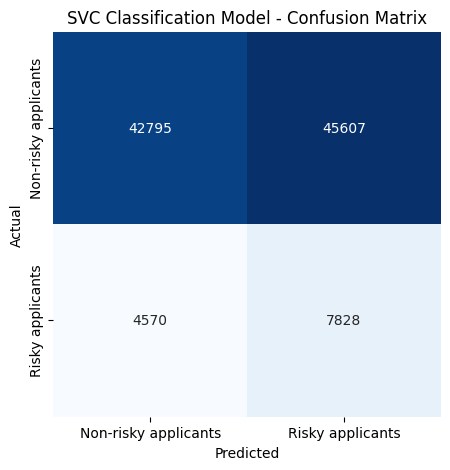

In [357]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_svc_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Non-risky applicants', 'Risky applicants'], 
            yticklabels=['Non-risky applicants', 'Risky applicants'])
plt.title('SVC Classification Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix SVC Classification Model - Insights**

- **True Positives (TP):** 7828 (Risky applicants correctly predicted as risky)
- **True Negatives (TN):** 42795 (Non-risky applicants correctly predicted as non-risky)
- **False Positives (FP):** 45607 (Non-risky applicants incorrectly predicted as risky)
- **False Negatives (FN):** 4570 (Risky applicants incorrectly predicted as non-risky)

There are many non-risky applicants incorrectly classified as risky. This is a significant issue, leading to a low precision for the "risky applicants" class. The model is better at identifying actual risky applicants, as indicated by the recall of around 0.6314. However, the high number of false positives affects the overall model utility.

### *SVC Cross Validation Score*

In [ ]:
# Display Cross Validation Score
cross_validation_f1_score('SVC Classification', svc_pipe)

SVC Classification Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.59987753 0.60615079 0.58676433 0.58691635 0.59428571]
F1 Score - Mean - Cross Validation: 0.5947989433589392
F1 Score - Std - Cross Validation: 0.007504800529301305


### *3. Decision Tree Classifier*

#### *Decision Tree Train & Test Score*

In [ ]:
# Train and Test Score for Base Model
train_test_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Score
Training Score: 0.9289
Testing Score: 0.8275


**Decision Tree Classifier Base Model Score - Insights**

The decision tree classifier you trained appears to be overfitting the data. This means that the model performs well on the data it was trained on (training score: 0.9289) but performs poorly on unseen data (testing score: 0.8275). The decision tree is too complex. A complex decision tree can learn the patterns of the training data too well, including patterns that are not generalizable to new data.

#### *Decision Tree Metric Score*

In [358]:
# Predict using base model
y_dt_class_train_pred = dt_class_pipe.predict(X_train_final)
y_dt_class_test_pred = dt_class_pipe.predict(X_test_final)

In [359]:
# Metric Score
dt_class_precision_train, dt_class_precision_test, dt_class_recall_train, dt_class_recall_test, dt_class_f1_train, dt_class_f1_test = metrics_score ('Decision Tree Classifier', y_dt_class_train_pred, y_dt_class_test_pred)

Decision Tree Classifier Base Model Score

Precision
Train Set: 0.8985760679490382
Test Set: 0.4056690033526364 

Recall
Train Set: 0.9670394666093128
Test Set: 0.858848201322794 

F1 Score
Train Set: 0.9315515499961153
Test Set: 0.551053149096931 



**Metric Score Decision Tree Classifier Base Model - Insights**

The high training set scores and lower test set scores, particularly in precision, are a classic sign of overfitting. The model learns the specific patterns of the training data too well, leading to inaccurate predictions on new data. A complex tree with many splits might be capturing noise or irrelevant details in the training data.

#### *Decision Tree Confusion Matrix*

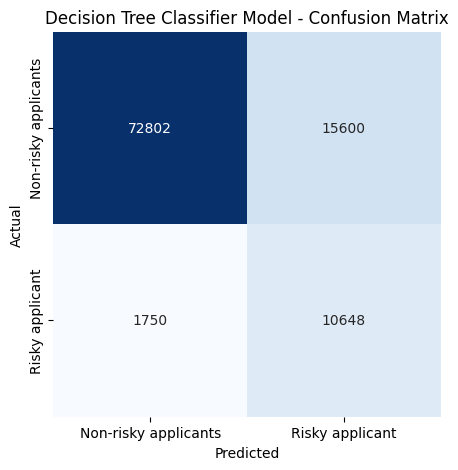

In [360]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_dt_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Non-risky applicants', 'Risky applicant'], 
            yticklabels=['Non-risky applicants', 'Risky applicant'])
plt.title('Decision Tree Classifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix Decision Tree Classifier Model - Insights**

- **True Positives (TP):** 10,648 (Risky applicants correctly classified as Risky)
- **True Negatives (TN):** 72,802 (Non-risky applicants correctly classified as Non-risky)
- **False Positives (FP):** 15,600 (Non-risky applicants incorrectly classified as Risky)
- **False Negatives (FN):** 1,750 (Risky applicants incorrectly classified as Non-risky)

The model performs well in identifying actual risky applicants (high recall) but has a moderate rate of false positives, resulting in lower precision. The accuracy and specificity are also fairly high, indicating good performance in identifying non-risky applicants correctly.

### *Decision Tree Cross Validation Score*

In [361]:
# Display Cross Validation Score
cross_validation_f1_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.82956499 0.83832962 0.83067177 0.83627336 0.84341777]
F1 Score - Mean - Cross Validation: 0.8356515019559122
F1 Score - Std - Cross Validation: 0.005093473751232353


### *4. Random Forest Classifier*

#### *Random Forest Train & Test Score*

In [ ]:
# Train and Test Score for Base Model
train_test_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Score
Training Score: 0.9216
Testing Score: 0.8351


**Random Forest Classifier Base Model Score - Insights**

- **Training Score (0.9216):** This is the accuracy of the model on the training data. An accuracy of 92.16% indicates that the model fits the training data very well. However, a very high training score can sometimes be a sign of overfitting, where the model learns the noise in the training data along with the actual patterns.

- **Testing Score (0.8351):** This is the accuracy of the model on the test data. An accuracy of 83.51% indicates how well the model generalizes to unseen data. This score is slightly lower than the training score, which is expected, as the model usually performs a bit better on the data it was trained on.

The gap between the training score (92.16%) and the testing score (83.51%) is not very large but notable. This suggests that the model is performing reasonably well on new, unseen data, but there might be a slight overfitting. The testing accuracy indicates hat the Random Forest Classifier is performing better on the test set than the Decision Tree Classifier, which had an accuracy of 82.75%.

#### *Random Forest Metric Score*

In [362]:
# Predict using base model
y_rf_class_train_pred = rf_class_pipe.predict(X_train_final)
y_rf_class_test_pred = rf_class_pipe.predict(X_test_final)

In [363]:
# Metric Score
rf_class_precision_train, rf_class_precision_test, rf_class_recall_train, rf_class_recall_test, rf_class_f1_train, rf_class_f1_test = metrics_score ('Random Forest Classifier', y_rf_class_train_pred, y_rf_class_test_pred)

Random Forest Classifier Base Model Score

Precision
Train Set: 0.8935820076796489
Test Set: 0.4129219053662793 

Recall
Train Set: 0.963490697924508
Test Set: 0.8397322148733667 

F1 Score
Train Set: 0.9272205117590748
Test Set: 0.5536146340166441 



**Metric Score Random Forest Classifier Base Model - Insights**

Analyzing the performance metrics of the Random Forest Classifier base model provides valuable insights into Risky loan applicant prediction:

- The significant drop in precision from the training set (89.36%) to the test set (41.29%) indicates potential overfitting. The model performs very well on the training data but struggles with precision on the test data, suggesting it may have learned noise or specific patterns in the training data that do not generalize well.
- The recall is relatively consistent between the training set (96.35%) and the test set (83.97%), although it drops, it remains high. This consistency suggests the model is still effective at identifying most of the actual positives in both sets.
- The model prioritizes recall over precision, which can be useful in scenarios where missing actual positive cases (false negatives) is more costly than having false positives. However, in contexts where false positives are equally or more critical, the model may need further tuning to improve precision.
- The drop in F1 score from the training set (92.72%) to the test set (55.36%) reflects the overall decline in model performance when moving from the training to the test set.

#### *Random Forest Confusion Matrix*

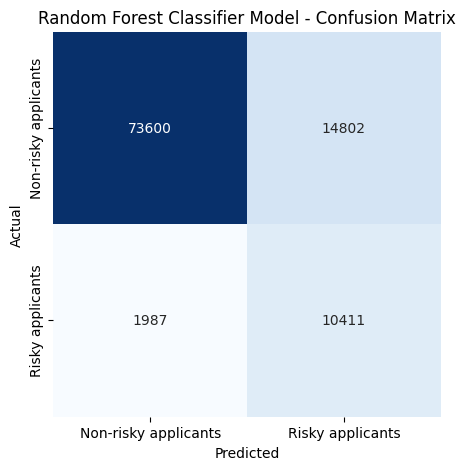

In [364]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_rf_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Non-risky applicants', 'Risky applicants'], 
            yticklabels=['Non-risky applicants', 'Risky applicants'])
plt.title('Random Forest Classifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix Random Forest Classifier Model - Insights**

- **True Positives (TP):** 10,411 (Risky applicants correctly classified as Risky)
- **True Negatives (TN):** 73,600 (Non-risky applicants correctly classified as Non-risky)
- **False Positives (FP):** 14,802 (Non-risky applicants incorrectly classified as Risky)
- **False Negatives (FN):** 1,987 (Risky applicants incorrectly classified as Non-risky)

The model has a high recall but low precision. This means it is good at identifying most of the risky applicants, but also incorrectly classifies many non-risky applicants as risky. This trade-off might be acceptable depending on the application context, especially if it is more important to identify risky applicants.


### *Random Forest Cross Validation Score*

In [365]:
# Display Cross Validation Score
cross_validation_f1_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.82479206 0.83364436 0.82886488 0.82991396 0.83408909]
F1 Score - Mean - Cross Validation: 0.8302608706860596
F1 Score - Std - Cross Validation: 0.003408234886748888


### *5. XGB Classifier*

#### *XGBC Train & Test Score*

In [366]:
# Train and Test Score for Base Model
train_test_score('XGBClassifier', xgb_class_pipe)

XGBClassifier Base Model Score
Training Score: 0.8058
Testing Score: 0.7481


**XGBClassifier Base Model Score - Insights**

- **Training Score (0.8058):** This is the accuracy of the model on the training data. An accuracy of 80.58% indicates that the model fits the training data reasonably well, but not as tightly as the Random Forest Classifier, which had a higher training accuracy. This might suggest that the XGBClassifier is less prone to overfitting.
- **Testing Score (0.7481):** This is the accuracy of the model on the test data. An accuracy of 74.81% indicates how well the model generalizes to unseen data. This score is lower than the Random Forest Classifier’s test accuracy (83.51%), suggesting that the XGBClassifier may not perform as well on this specific dataset.

The gap between the training score (80.58%) and the testing score (74.81%) is not very large, suggesting that the model is generalizing reasonably well, but there is room for improvement.

#### *XGBC Metric Score*

In [368]:
# Predict using base model
y_xgb_class_train_pred = xgb_class_pipe.predict(X_train_final)
y_xgb_class_test_pred = xgb_class_pipe.predict(X_test_final)

In [369]:
# Metric Score
xgb_class_precision_train, xgb_class_precision_test, xgb_class_recall_train, xgb_class_recall_test, xgb_class_f1_train, xgb_class_f1_test = metrics_score ('XGBClassifier', y_xgb_class_train_pred, y_xgb_class_test_pred)

XGBClassifier Base Model Score

Precision
Train Set: 0.7942058975685463
Test Set: 0.2989480198019802 

Recall
Train Set: 0.8254651037745995
Test Set: 0.7793192450395225 

F1 Score
Train Set: 0.8095338536173803
Test Set: 0.43213023838275416 



**Metric Score XGBClassifier Base Model - Insights**

- The significant drop in precision from the training set (79.42%) to the test set (29.89%) indicates potential overfitting. The model performs well on the training data but struggles with precision on the test data, suggesting it may have learned noise or specific patterns in the training data that do not generalize well.
- The recall is relatively consistent between the training set (82.55%) and the test set (77.93%), although it drops, it remains high. This consistency suggests the model is still effective at identifying most of the actual positives in both sets.

#### *XGBClassifier Confusion Matrix*

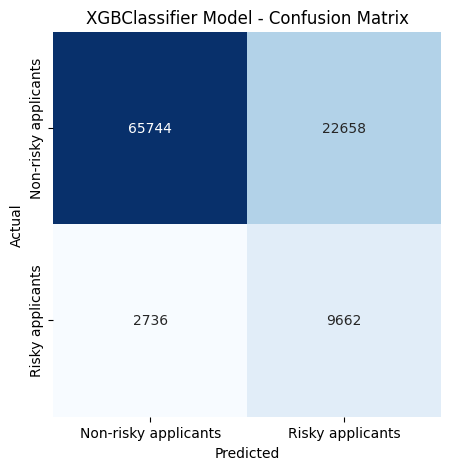

In [370]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_xgb_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Non-risky applicants', 'Risky applicants'], 
            yticklabels=['Non-risky applicants', 'Risky applicants'])
plt.title('XGBClassifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix XGBClassifier Model - Insights**

- **True Negative (TN):** 65744 non-risky applicants correctly classified as non-risky.
- **False Positive (FP):** 22658 non-risky applicants incorrectly classified as risky.
- **False Negative (FN):** 2736 risky applicants incorrectly classified as non-risky.
- **True Positive (TP):** 9662 risky applicants correctly classified as risky.

- High `TN` and `TP` values indicate that the model is good at correctly identifying both non-risky and risky applicants.
- High `FP` values suggest that the model often misjudge non-risky applicants as risky, which could lead to unnecessary rejections.
- High `FN` values indicate that the model often fails to identify risky applicants, which could lead to risky situation if those applicants are approved.

### *XGBC Cross Validation Score*

In [371]:
# Display Cross Validation Score
cross_validation_f1_score('XGBClassifier', xgb_class_pipe)

XGBClassifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.76029816 0.7618165  0.7633946  0.76106424 0.77066356]
F1 Score - Mean - Cross Validation: 0.763447412445099
F1 Score - Std - Cross Validation: 0.0037505413051532968


**Base Model Performance Summary**  

From all 5 base model that we already evaluate, now its time to choose the best model. First i will list all model performance on a table format for easier overview of all models.

| Base Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score Train | F1 Score Test | Cross Validation F1 Mean  |
|-----------------|-------------|------------|-----------------|----------------|--------------|-------------|----------------|---------------|---------------------------|
| KNN             | 0.801       | 0.7632     | 0.802           | 0.314          | 0.799        | 0.787       | 0.800          | 0.450         | 0.763                     |
| SVC             | 0.571       | 0.502      | 0.561           | 0.146          | 0.648        | 0.631       | 0.601          | 0.237         | 0.594                     |
| Decision Tree   | 0.929       | 0.82       | 0.898           | 0.405          | 0.967        | 0.858       | 0.931          | 0.551         | 0.835                     |
| Random Forest   | 0.921       | 0.835      | 0.893           | 0.412          | 0.963        | 0.839       | 0.927          | 0.553         | 0.830                     |
| XGBoost         | 0.805       | 0.748      | 0.794           | 0.298          | 0.825        | 0.779       | 0.809          | 0.432         | 0.763                     |



## Best Base Model Selection

**Best Base Model Decision**

Based on the Summary Evaluation i conclude that the best model of all 5 is **Random Forest Classifier**. Heres the reasons why:
- Random Forest and Decision Tree have the highest test scores (0.835 and 0.82 respectively).
- Precision Test is highest for the Random Forest (0.412) and Decision Tree (0.405).
- Recall Test is highest for Decision Tree (0.858), followed by Random Forest (0.839).
- F1 Score Test is highest for Random Forest (0.553) and Decision Tree (0.551).
- Cross Validation F1 Mean is highest for Decision Tree (0.835), followed by Random Forest (0.83).

## Hyperparameter Tuning The Model

**Hyperparameter Tuning - Introduction**  

Next we will Hyperparameter Tuning the best model. Hyperparameter tuning is the process of `finding the optimal hyperparameters for a machine learning algorithm to improve its performance on unseen data`. Hyperparameters are settings or configurations that are set before the model is trained, such as the number of trees in a random forest or the learning rate in a gradient boosting algorithm. Tuning these hyperparameters involves systematically searching through a range of possible values to find the combination that results in the best performance according to a chosen evaluation metric, such as accuracy or F1 score.

**Why we should do it?**  

For our best model, which is the Random Forest Classifier, hyperparameter tuning is essential for several reasons:

1. **Optimizing Performance**: By tuning the hyperparameters, you can fine-tune the model's behavior to achieve the best possible performance on your dataset. This could lead to higher accuracy, better precision-recall balance, or improved generalization capability.

2. **Avoiding Overfitting**: Hyperparameter tuning helps prevent overfitting, where the model learns to fit the training data too closely and performs poorly on unseen data. By finding the optimal hyperparameters, you can ensure that the model generalizes well to new data.

3. **Enhancing Interpretability**: Tuning hyperparameters can also improve the interpretability of the model by finding simpler and more understandable configurations. This is particularly important in scenarios where model interpretability is crucial for decision-making.

4. **Meeting Business Objectives**: Hyperparameter tuning allows you to tailor the model's performance to meet specific business objectives or requirements. For example, if maximizing precision is more important than recall in your application, you can tune the hyperparameters accordingly.

5. **Improving Efficiency**: Tuning hyperparameters can also lead to more efficient models, both in terms of computational resources and prediction speed. By finding the optimal configuration, you can potentially reduce the model's complexity and resource requirements.

### *Tuned Model Definition*

In [373]:
# Define the hyperparameter grid
rf_class_param_grid = {
    'rf_class__n_estimators': [200, 300],
    'rf_class__max_depth': [5, 7],
    'rf_class__min_samples_split': [3, 4, 5]
}

# Defining the grid search for the model
rf_class_grid = GridSearchCV(rf_class_pipe, rf_class_param_grid, cv=5)

rf_class_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Married/Single',
                                                                          'House_Ownership',
                                                                          'Car_Ownership']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Experience',
                                                                          'CURRENT_JOB_YRS',
                                                                          'CURRENT_HOUSE_YRS'])])),
                                       ('rf_class',
                                        RandomForestClassifier(n_estimators=11,
                                                               n_jobs=-1))]),
             param_grid={'rf_class__max_depth': [5, 7],
                         'rf_class__min_samples_split': [3, 4, 5],
                         'rf_class__n_estimators': [200, 300]})

**Hyperparameter Tuning Random Forest Classifier - Explanations**  

Code above sets up a GridSearchCV object named `rf_class_grid` to perform hyperparameter tuning for your Random Forest Classifier pipeline. The `rf_class_param_grid` dictionary specifies the hyperparameters to tune (`n_estimators`, `max_depth`, and `min_samples_split`) and the range of values to search through. The `cv=5` parameter indicates 5-fold cross-validation will be used to evaluate the model's performance for each combination of hyperparameters. The GridSearchCV object will then systematically explore the hyperparameter space, training and evaluating the model with different configurations to find the best combination that maximizes performance.  

### *Tuned Model Training*

In [374]:
# Modelling with Hyperparameter Tuning using Grid Search
rf_class_grid.fit(X_train_final, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Married/Single',
                                                                          'House_Ownership',
                                                                          'Car_Ownership']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Experience',
                                                                          'CURRENT_JOB_YRS',
                                                                          'CURRENT_HOUSE_YRS'])])),
                                       ('rf_class',
                                        RandomForestClassifier(n_estimators=11,
                                                               n_jobs=-1))]),
             param_grid={'rf_class__max_depth': [5, 7],
                         'rf_class__min_samples_split': [3, 4, 5],
                         'rf_class__n_estimators': [200, 300]})

**Fit Tuned Model to train dataset**  

Code above executes the GridSearchCV to tune hyperparameters and fit the random forest classifier to the training data.

### *Tuned Model Train and Test Score*

In [375]:
# Train and Test Score for Base Model
train_test_score('Random Forest Classifier', rf_class_grid, True)

Tuned Random Forest Classifier Model Score
Best params for Random Forest Classifier: {'rf_class__max_depth': 7, 'rf_class__min_samples_split': 3, 'rf_class__n_estimators': 200}
Training Score: 0.5974
Testing Score: 0.6414


**Tuned Model Train and Test Score - Insights**  

The untuned Random Forest model still outperform the tuned Random Forest model based on the provided metrics. Therefore, based on the available data, it is advisable to stick with the untuned Random Forest model or the Decision Tree model.

If you have further options for hyperparameter tuning or additional data preprocessing steps, you might be able to improve the tuned model's performance. However, based on the current scores, the untuned Random Forest remains the best choice.

### *Tuned Model Metrics Score*

In [376]:
# Predict using tuned model
y_rf_class_tuned_train_pred = rf_class_grid.predict(X_train_final)
y_rf_class_tuned_test_pred = rf_class_grid.predict(X_test_final)

In [377]:
# Metric Score
rf_class_tuned_precision_train, rf_class_tuned_precision_test, rf_class_tuned_recall_train, rf_class_tuned_recall_test, rf_class_tuned_f1_train, rf_class_tuned_f1_test = metrics_score ('Random Forest Classifier', y_rf_class_tuned_train_pred, y_rf_class_tuned_test_pred, True)

Random Forest Classifier Tuned Model Score

Precision
Train Set: 0.6144898217220888
Test Set: 0.17173504368019463 

Recall
Train Set: 0.522636842671255
Test Set: 0.501048556218745 

F1 Score
Train Set: 0.5648535564853556
Test Set: 0.2557957586987853 



### *Tuned Model Confusion Matrix*

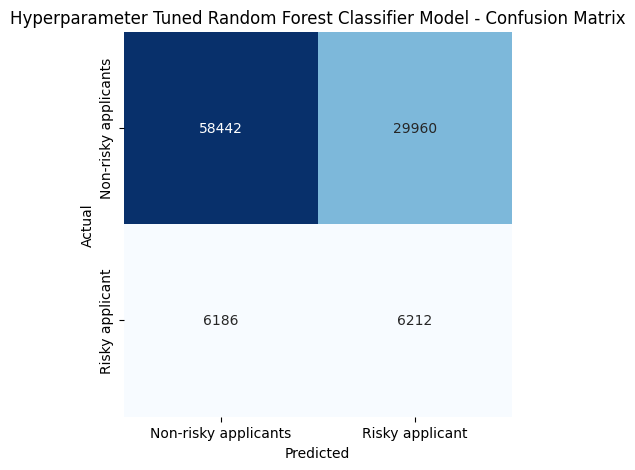

In [379]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_rf_class_tuned_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Non-risky applicants', 'Risky applicant'], 
            yticklabels=['Non-risky applicants', 'Risky applicant'])
plt.title('Hyperparameter Tuned Random Forest Classifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### *Tuned Model Cross Validation Score*

In [ ]:
# Display Cross Validation Score
cross_validation_f1_score('Random Forest Classifier', rf_class_grid, True)

Random Forest Classifier Tuned Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.54811777 0.56240992 0.53008468 0.56743398 0.5585168 ]
F1 Score - Mean - Cross Validation: 0.5533126294012156
F1 Score - Std - Cross Validation: 0.013234656218344134


# **9. Model Saving**

In [380]:
# Saving the model
with open('model.pkl', 'wb') as file_1:
    pickle.dump(rf_class_grid, file_1)

**Model Saving - Explanation**

The code above saves the best model overall, which is Hyperparameter Tuned Random Forest Classifier model rf_class_grid into a file named 'model.pkl' using Python's pickle module.

# **10. Model Inference**

# **11. Conclusions**  

# **Conceptual Questions Answered**

## 1. Explain the background of bagging and how bagging works!

Bagging was originally proposed by Leo Breiman in 1996 [3]. The motivation comes from the fact that unstable inductive learners such as decision trees tend to generate very different models with just a slight change in the training data, for example, the inclusion or exclusion of one example.

Bagging (Bootstrap Aggregating) involves training multiple models independently and combining their predictions through averaging or voting. Boosting, on the other hand, builds models sequentially, where each subsequent model corrects the errors of its predecessor, ultimately creating a strong ensemble.

## 2. Explain the difference in how the Random Forest algorithm works compared to the boosting algorithm of your choice!

**Random Forest**

Random Forest is an ensemble method that builds multiple decision trees and merges them together to get a more accurate and stable prediction. It then takes these many decision trees and combines them to avoid overfitting and produce more accurate predictions.

## 3. Explain what is meant by Cross Validation!

### *Answer 3*

Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

Dataset link : https://drive.google.com/file/d/1ikYAVbPwmkCKCAUg3l1M6f5xLxi0nv1O/view?usp=drive_link